In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
complete = pd.read_csv('complete.csv')

In [3]:
complete.head()

,Date,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Latitude,Longitude,Death,Total Confirmed cases
0,2020-01-30,Kerala,1,0,0,10.8505,76.2711,0,1
1,2020-01-31,Kerala,1,0,0,10.8505,76.2711,0,1
2,2020-02-01,Kerala,2,0,0,10.8505,76.2711,0,2
3,2020-02-02,Kerala,3,0,0,10.8505,76.2711,0,3
4,2020-02-03,Kerala,3,0,0,10.8505,76.2711,0,3


In [4]:
complete['Date'] = pd.to_datetime(complete['Date'])
complete['Date'] = complete['Date'].dt.strftime('%d/%m/%Y')


In [5]:
 states = complete['Name of State / UT'].unique()

C:\Users\Bliss\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
----------------------------------------

C:\Users\Bliss\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
----------------------------------------

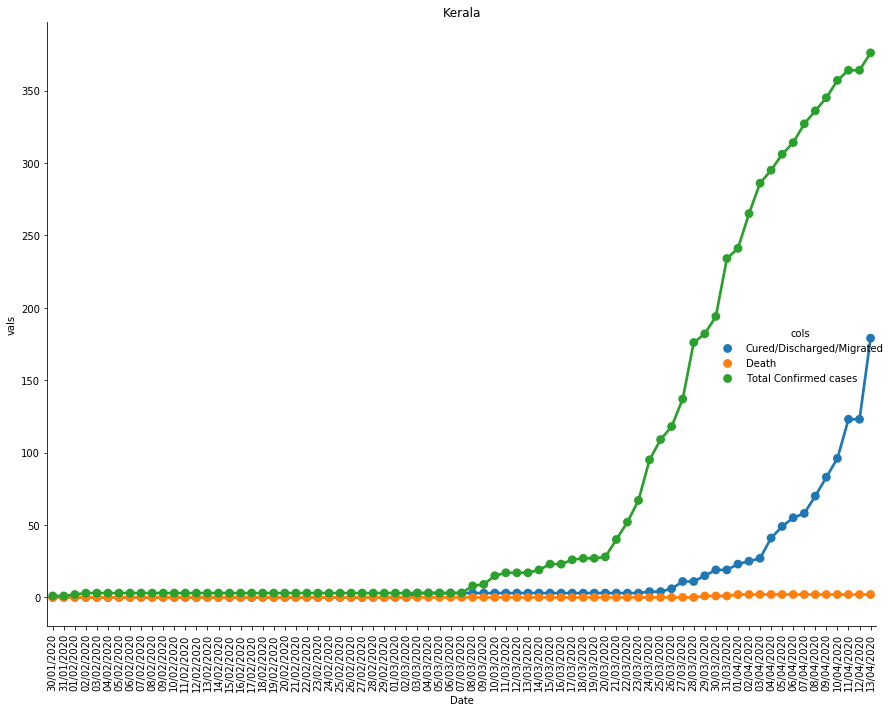

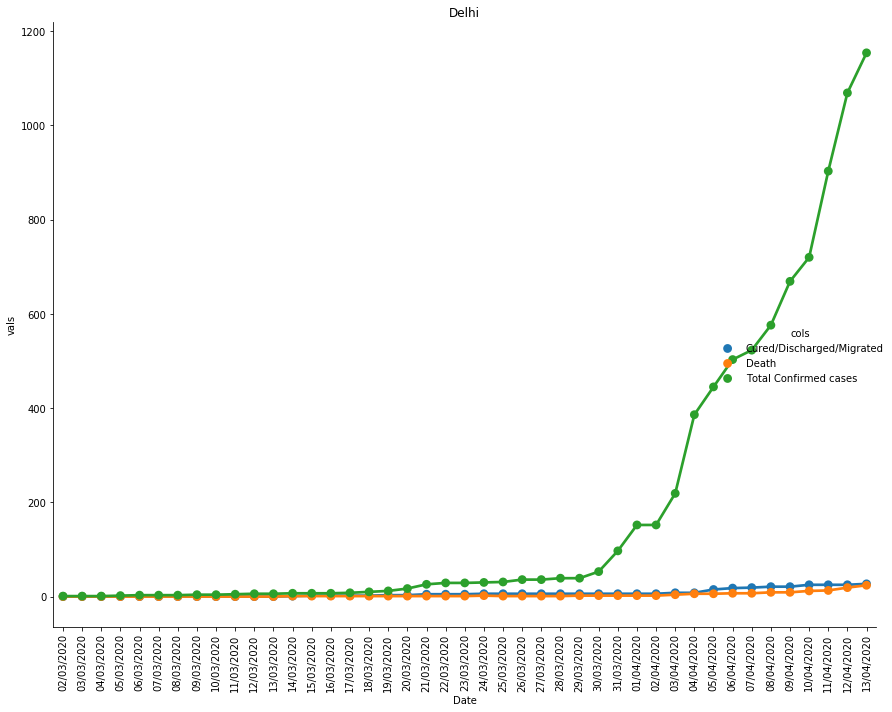

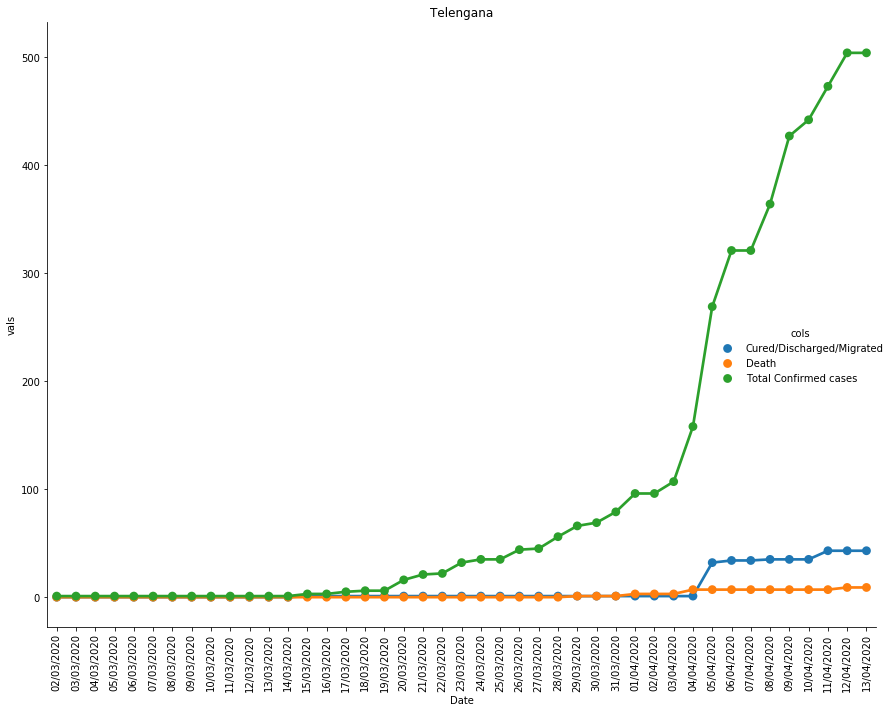

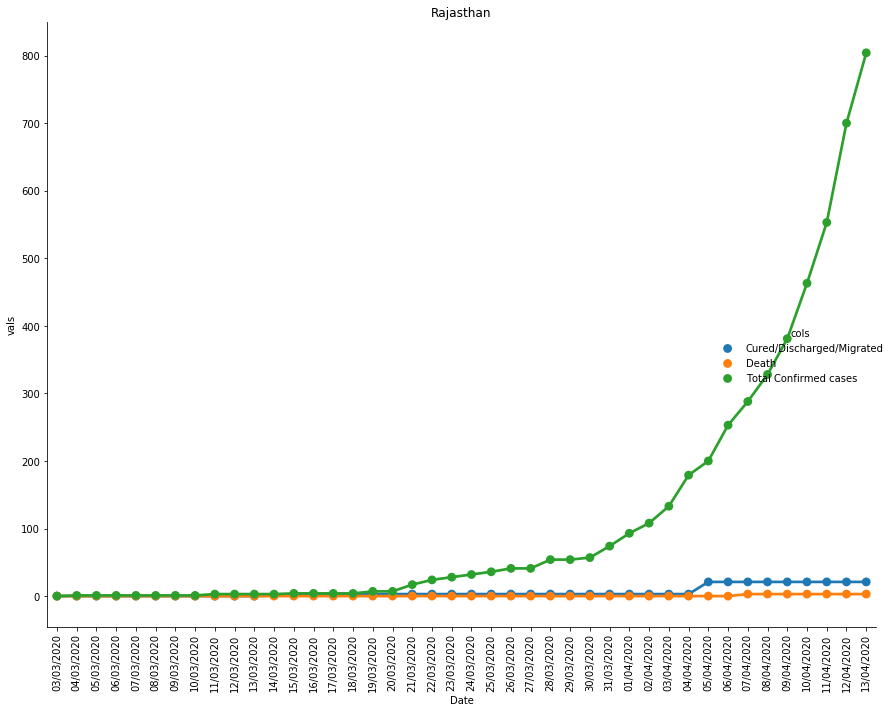

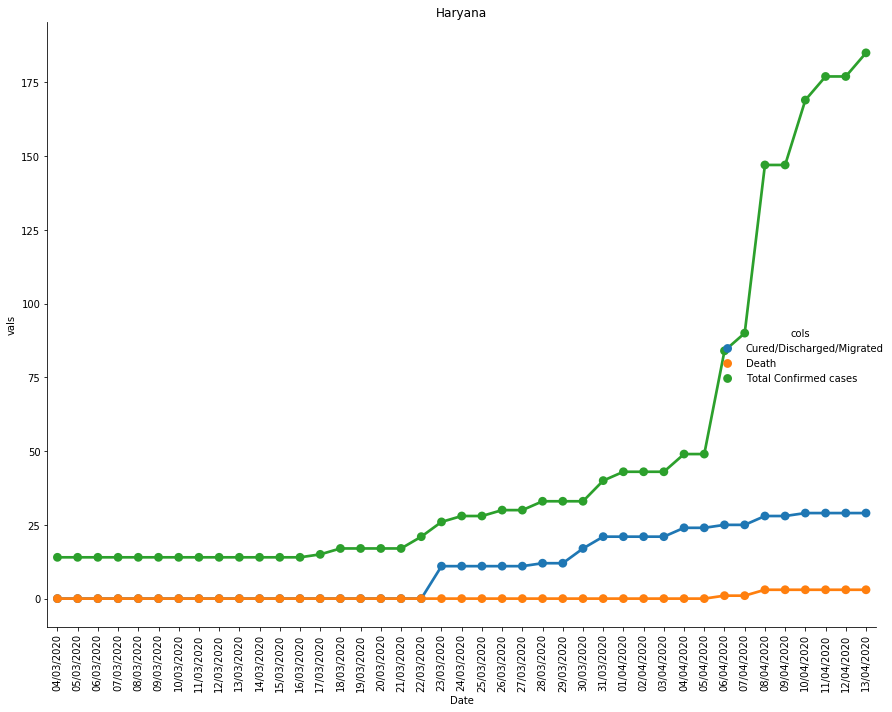

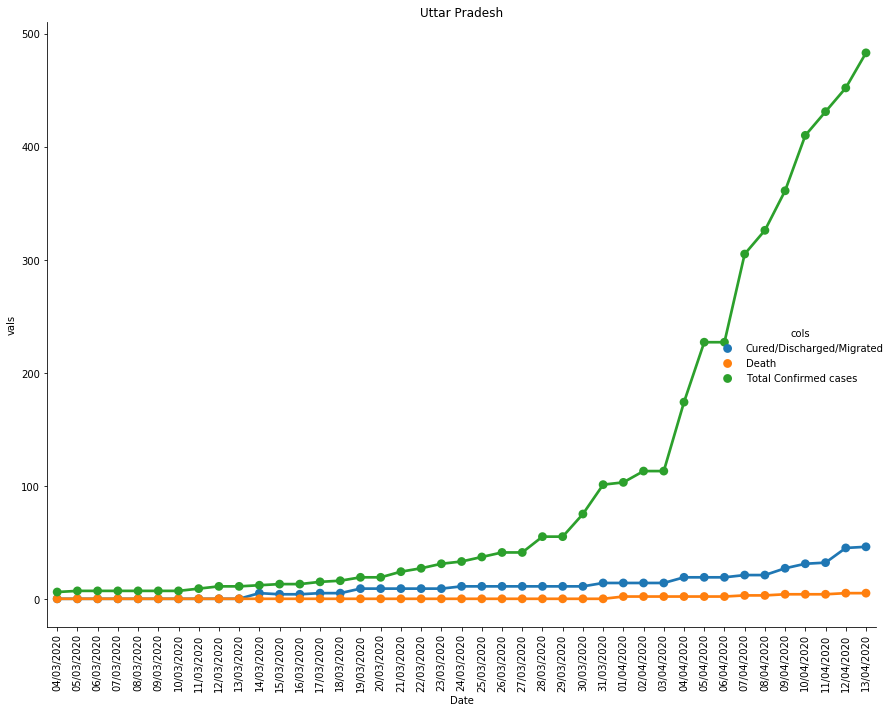

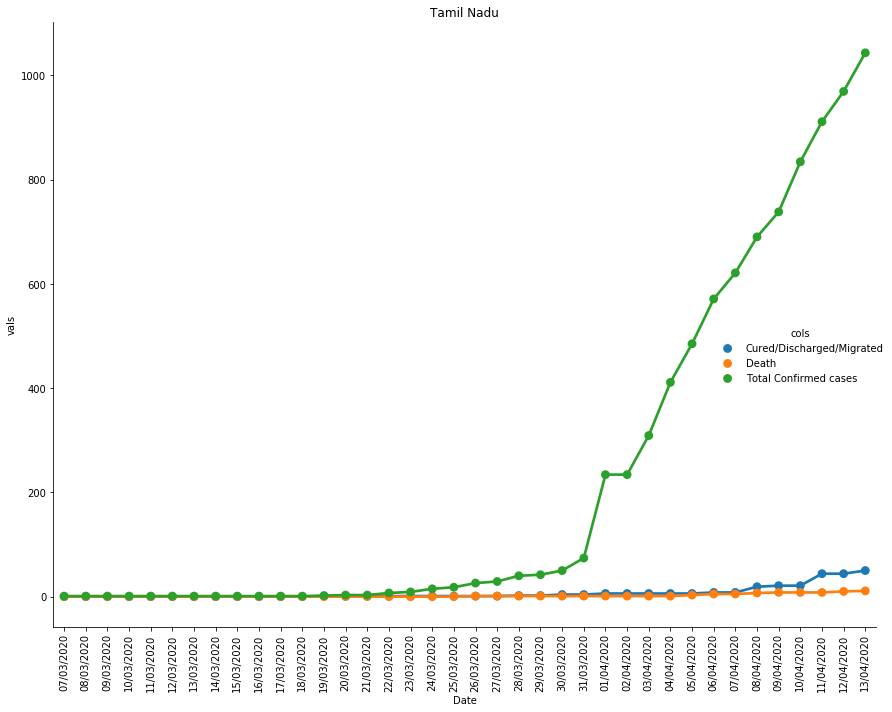

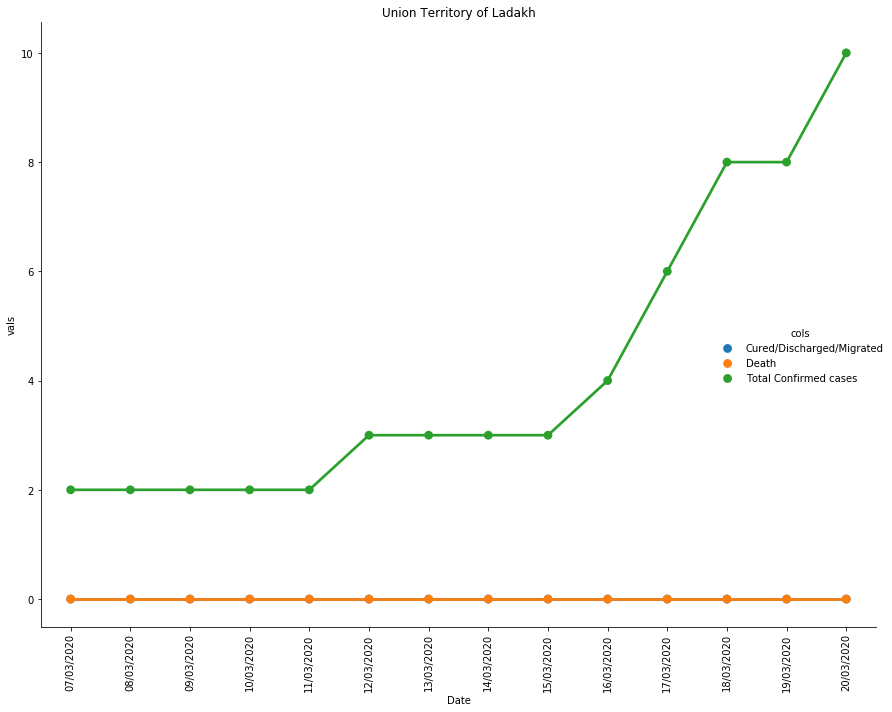

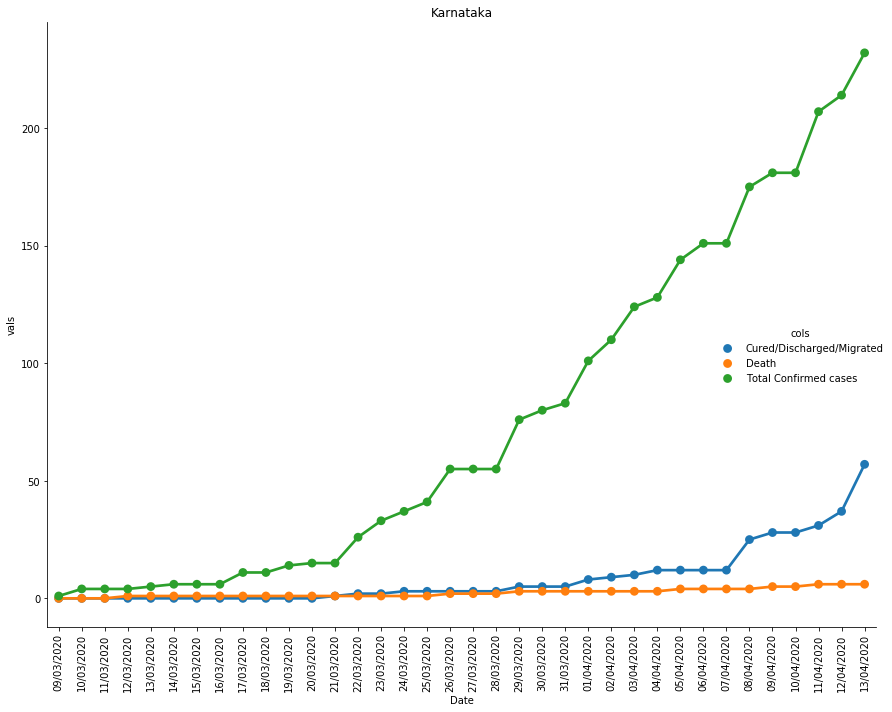

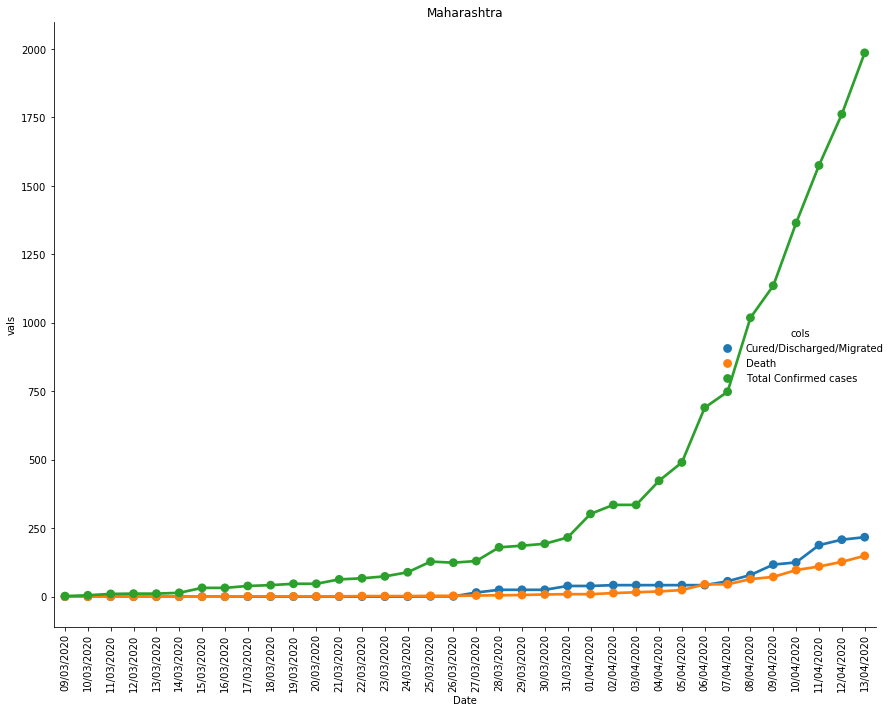

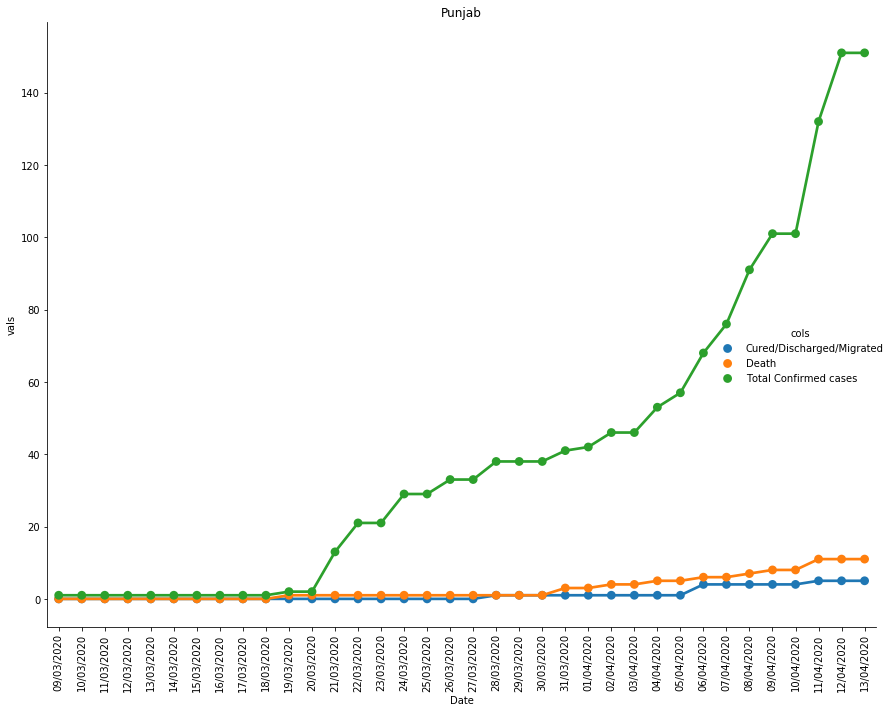

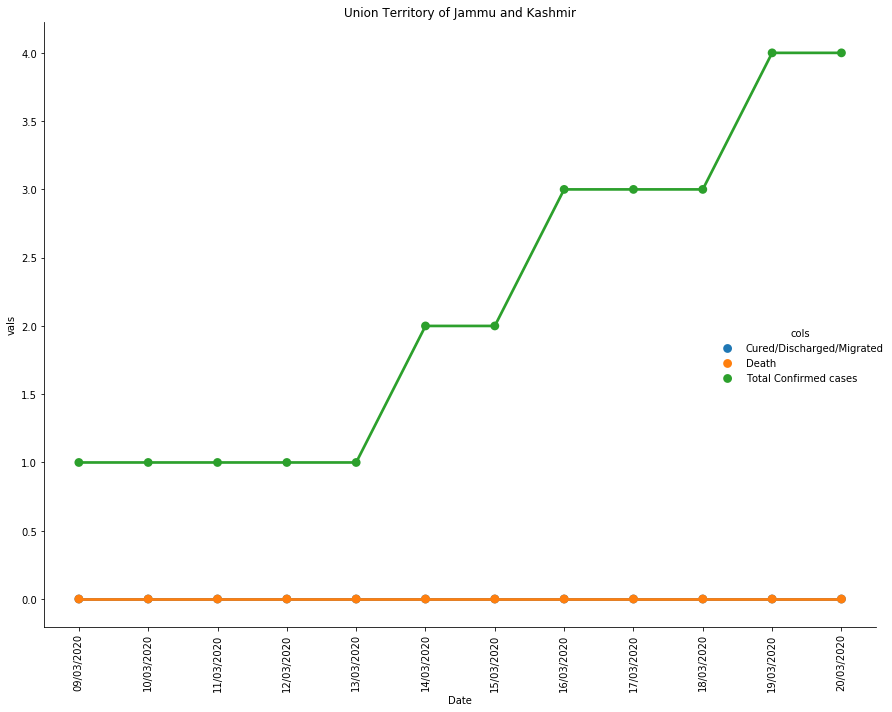

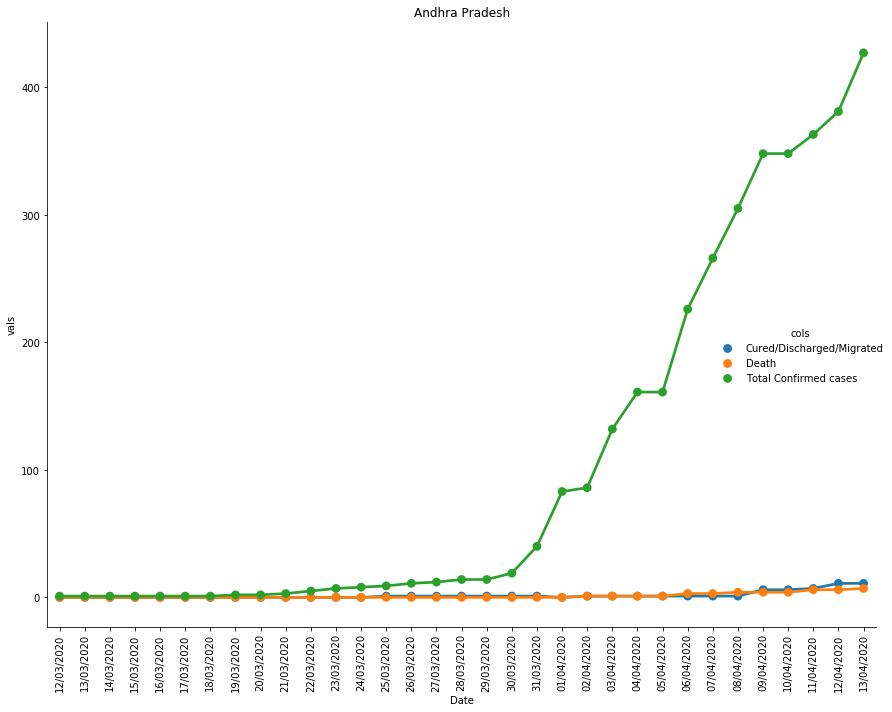

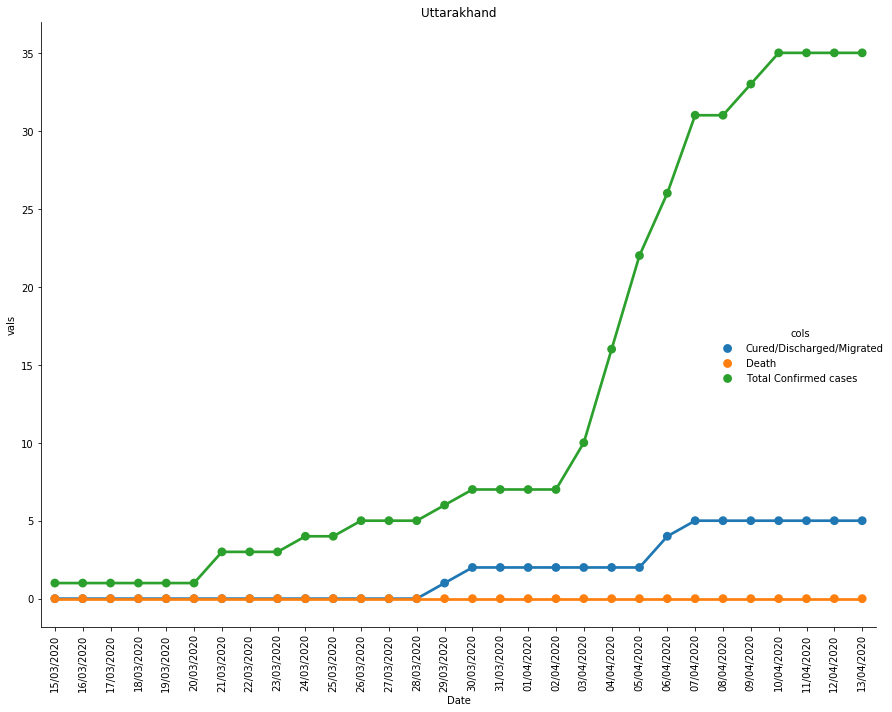

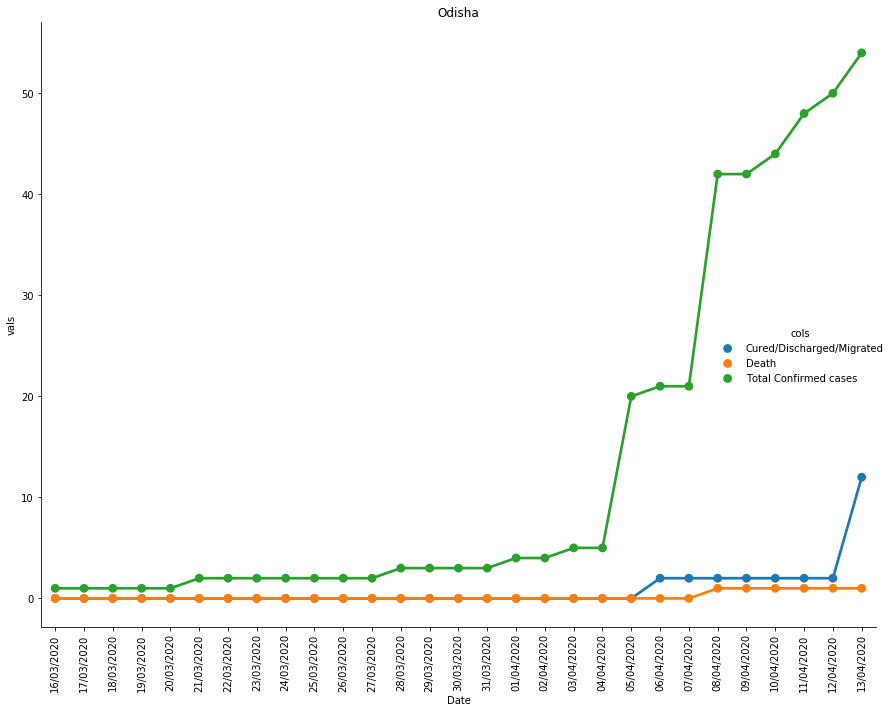

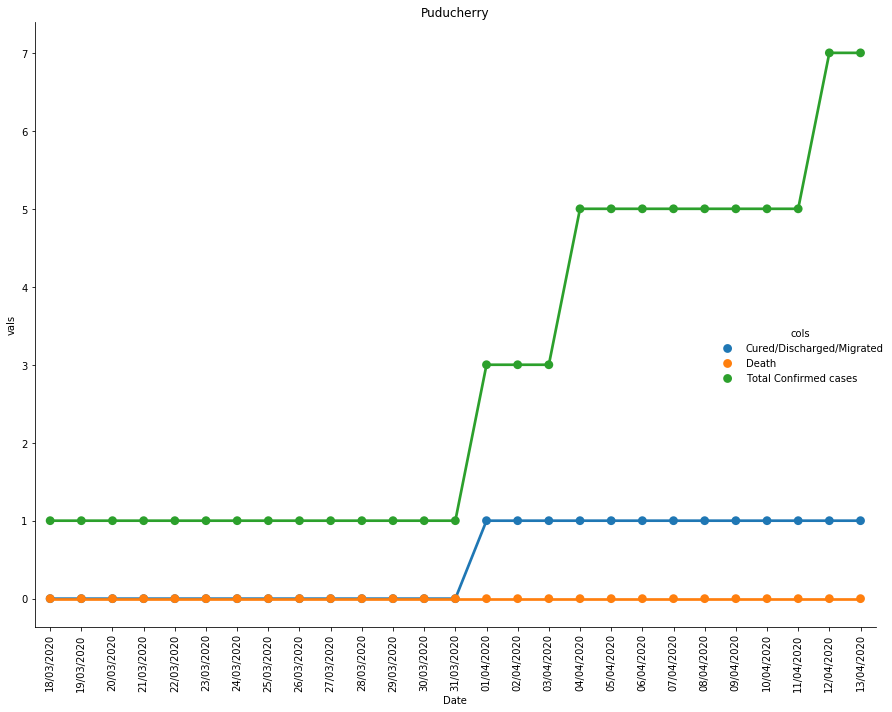

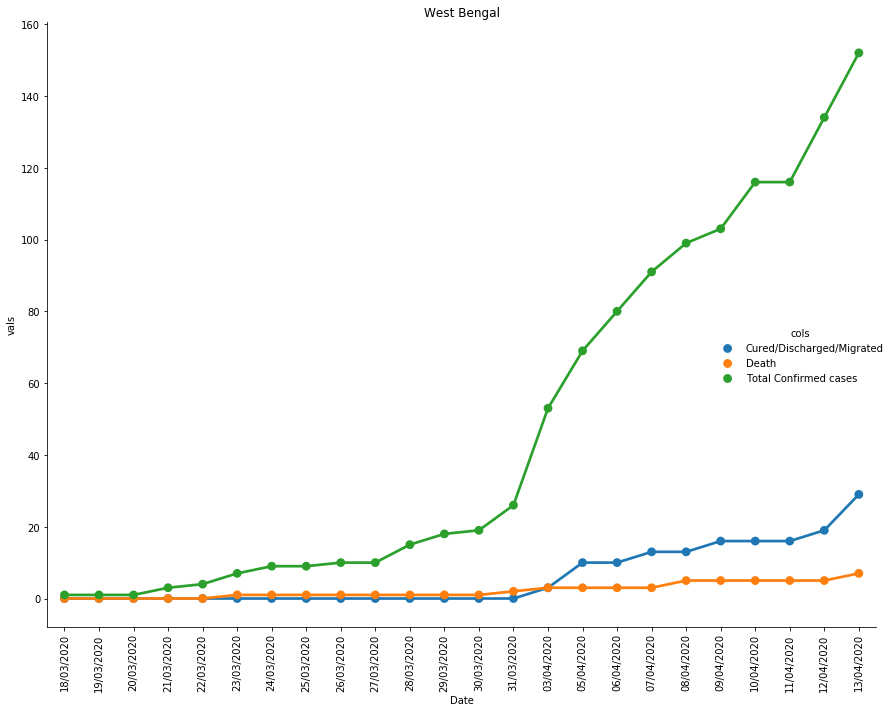

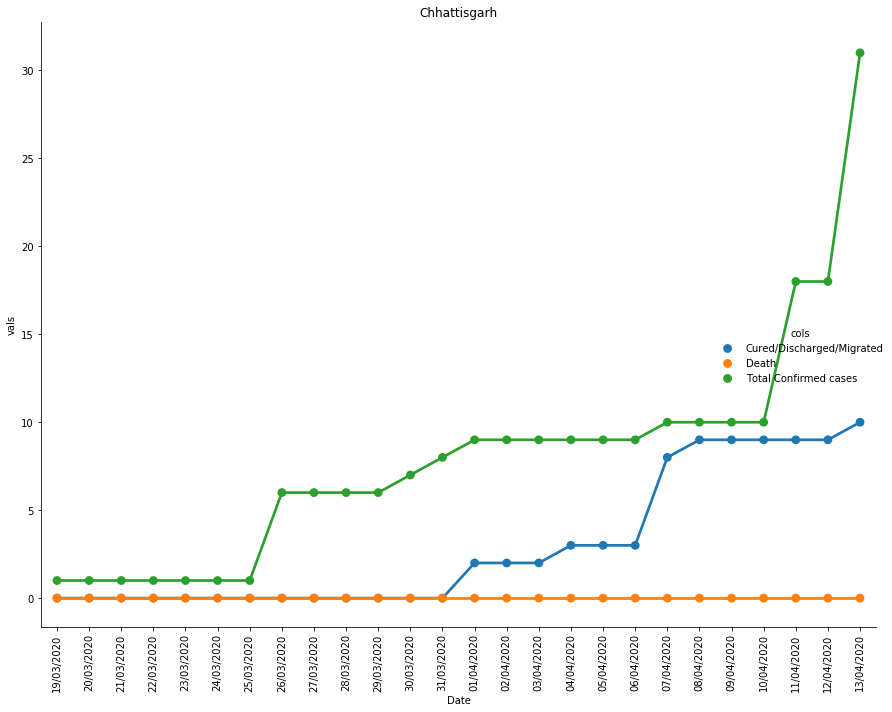

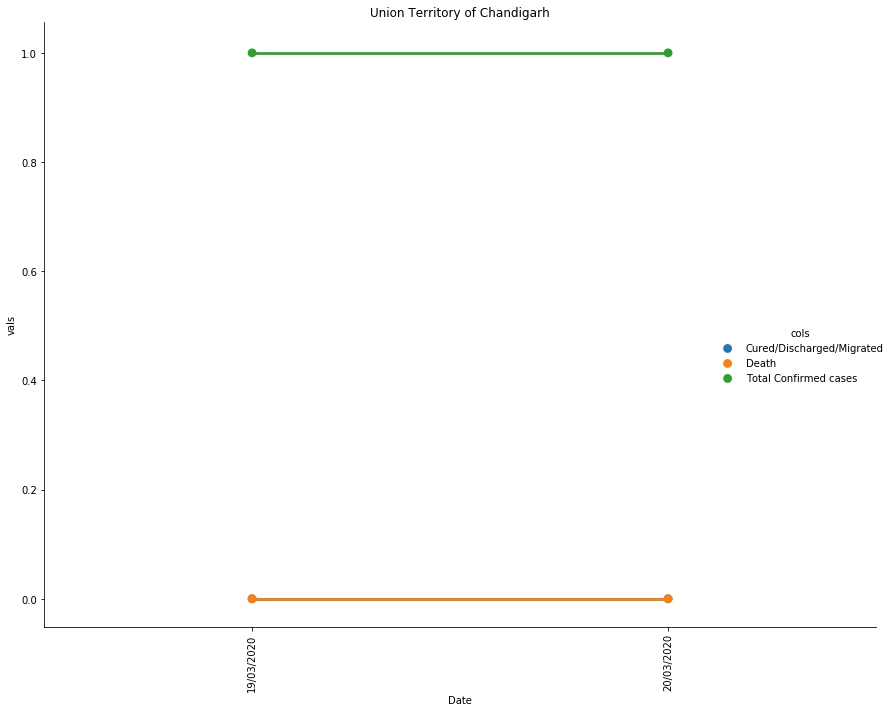

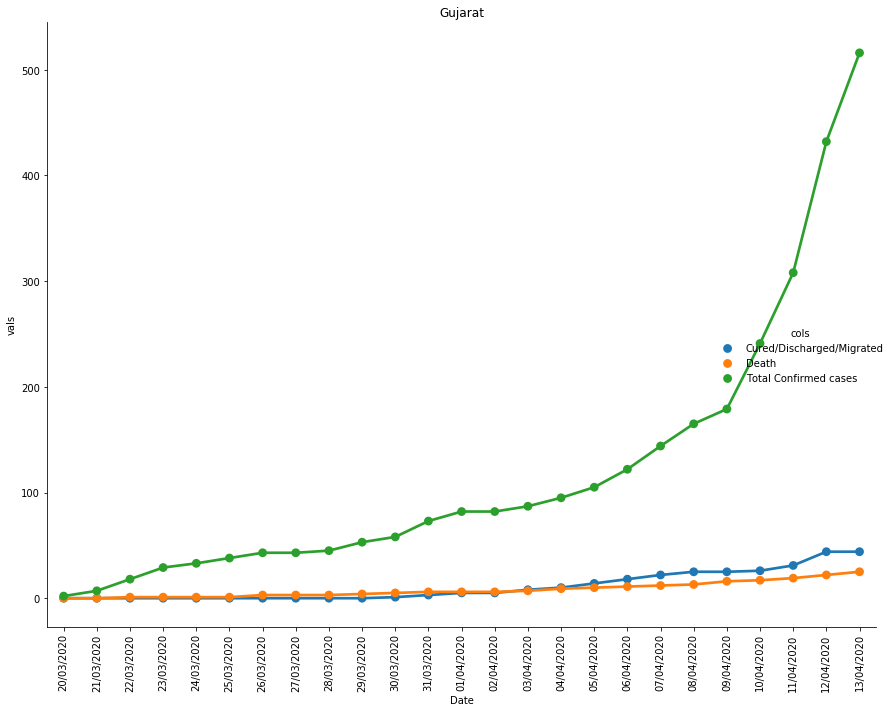

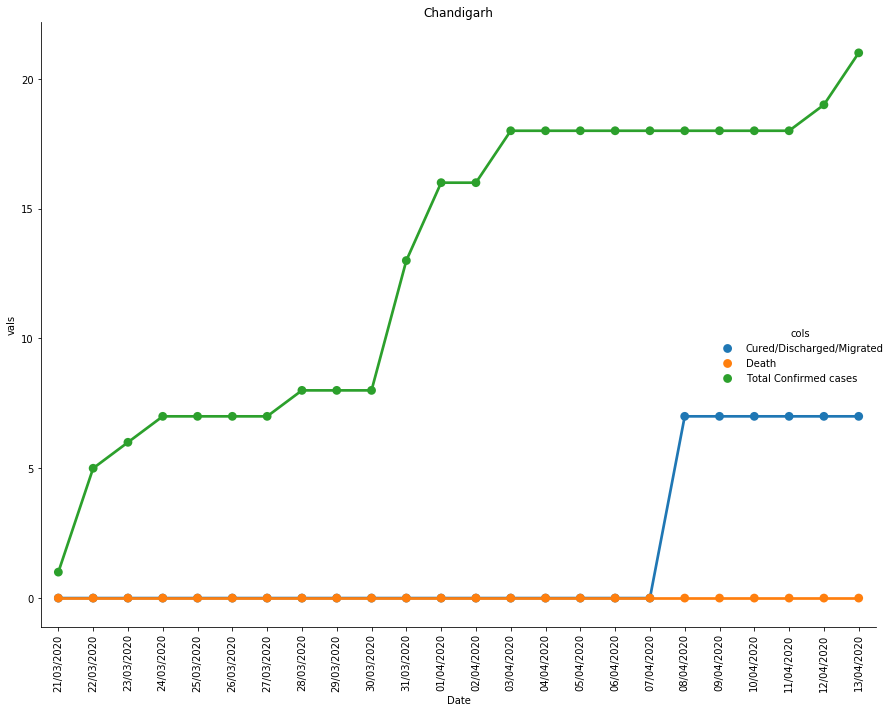

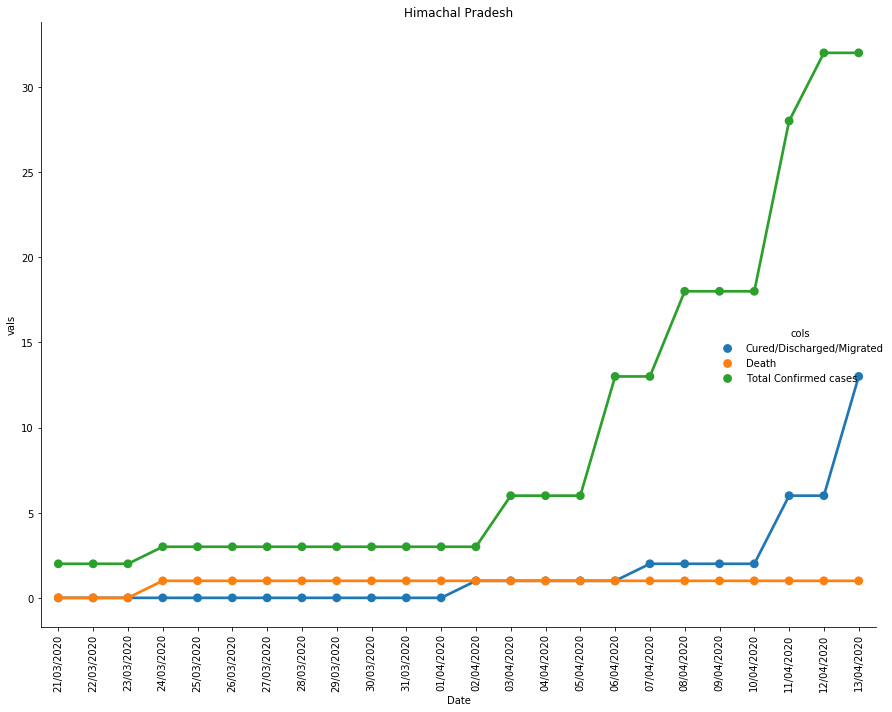

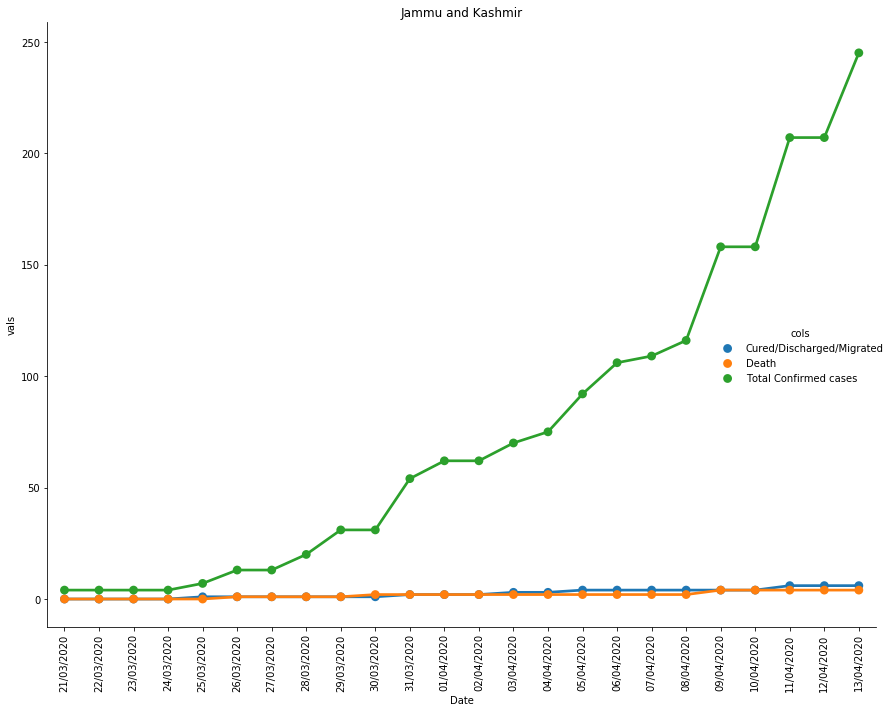

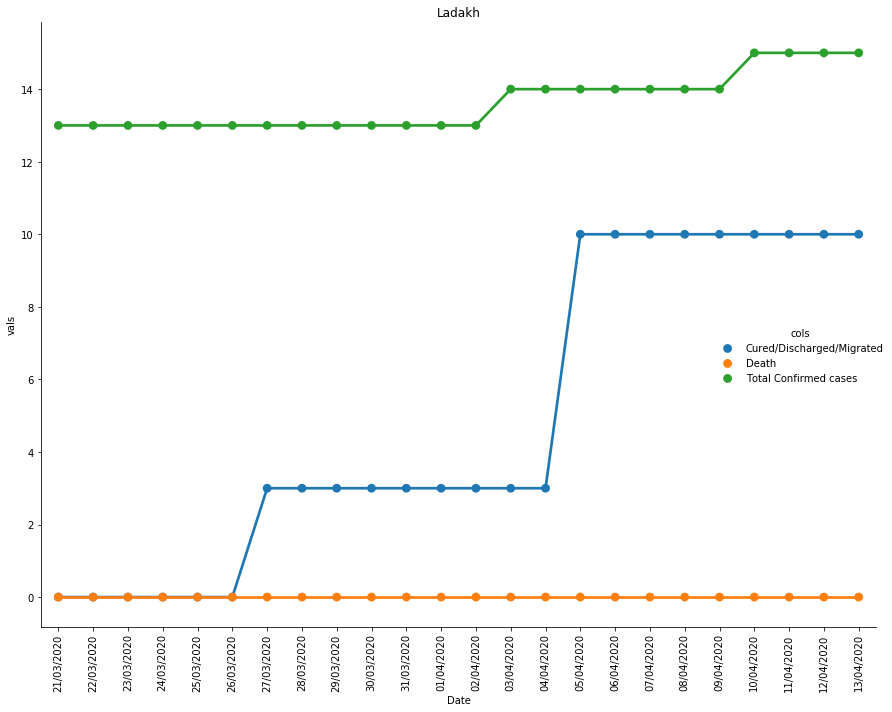

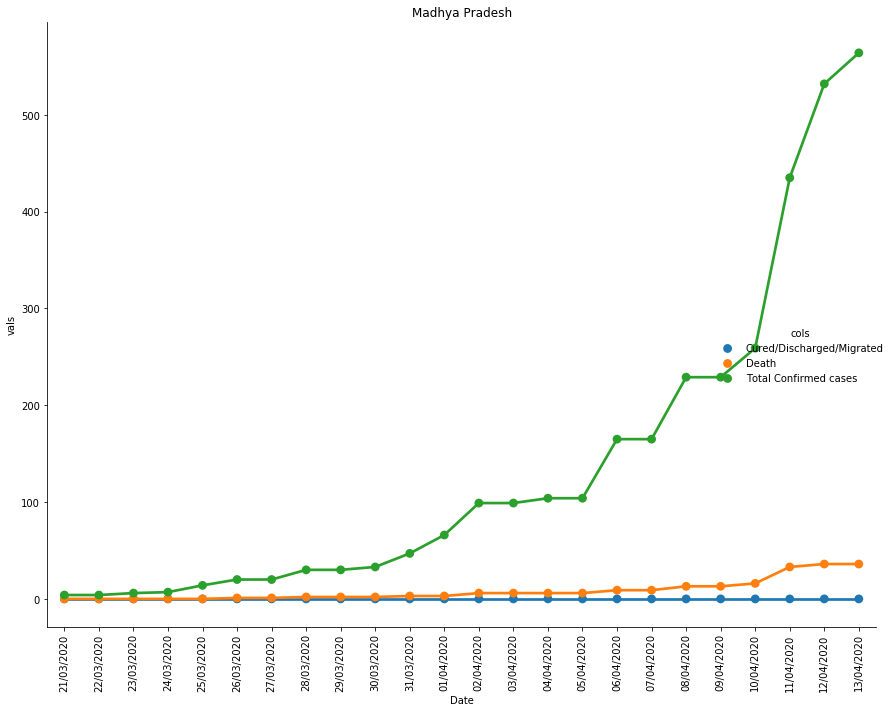

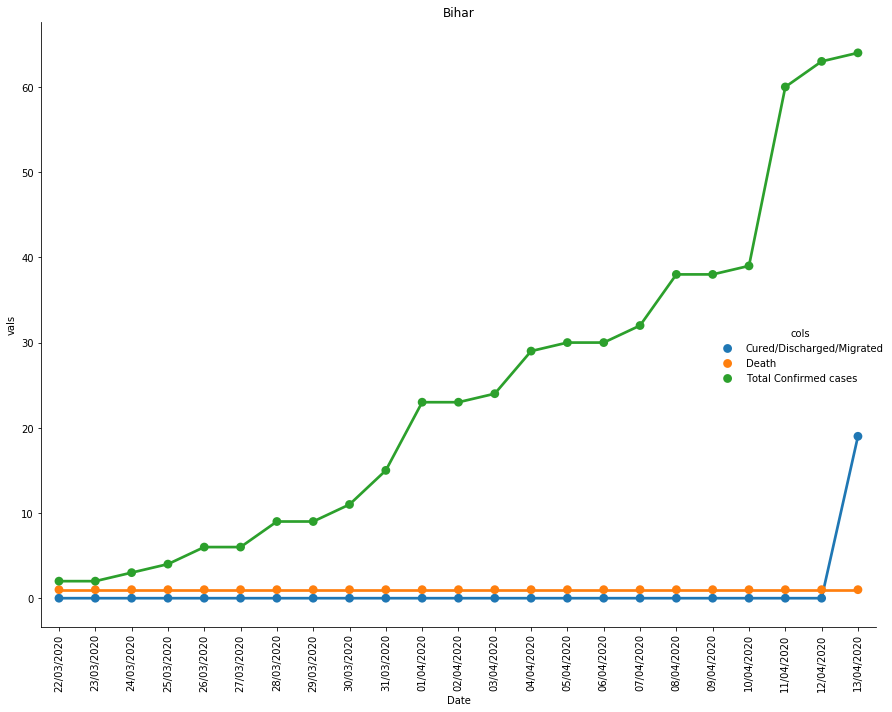

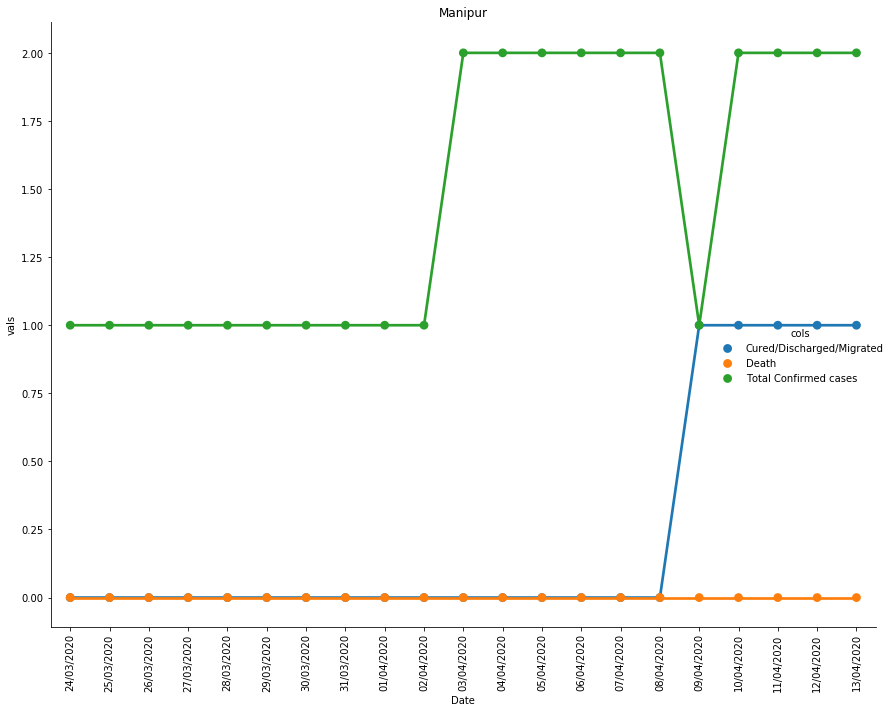

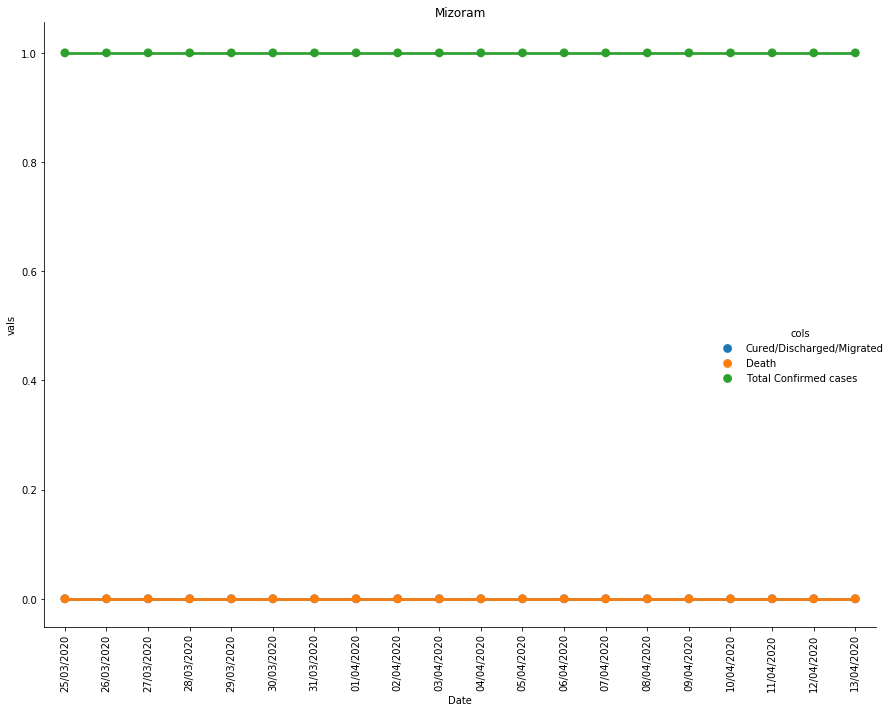

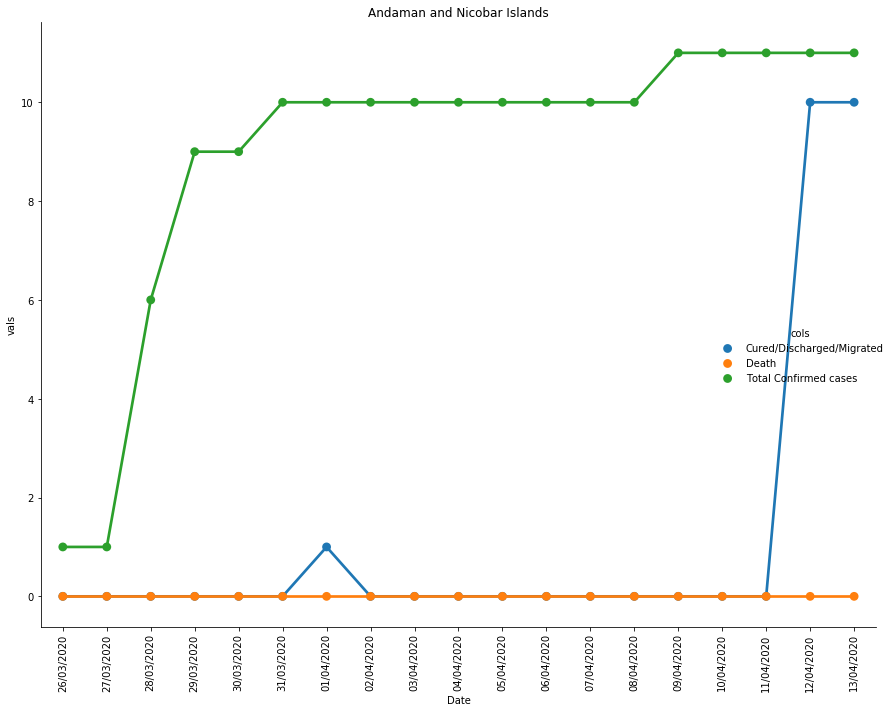

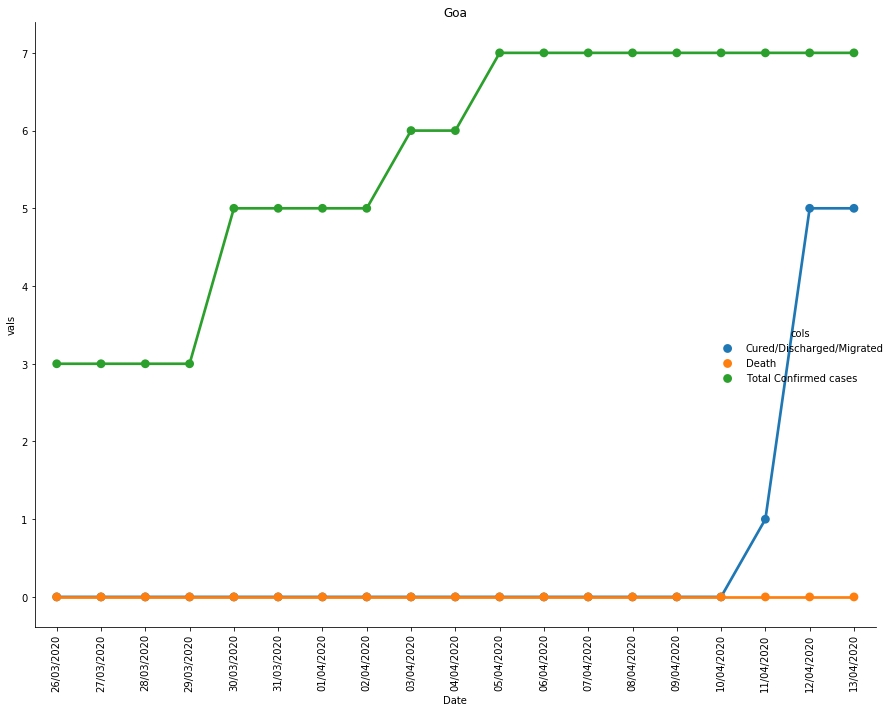

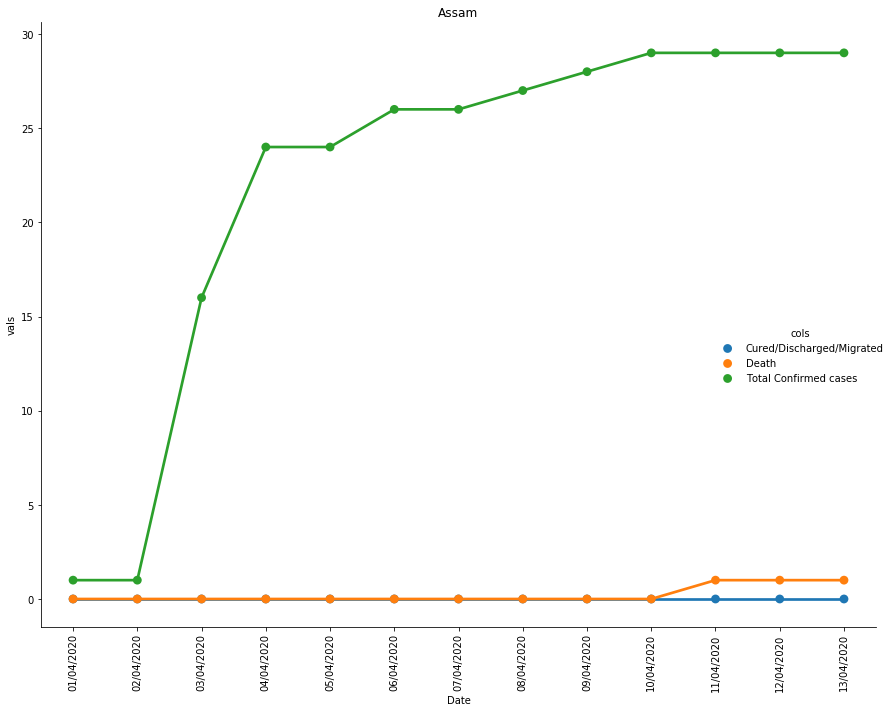

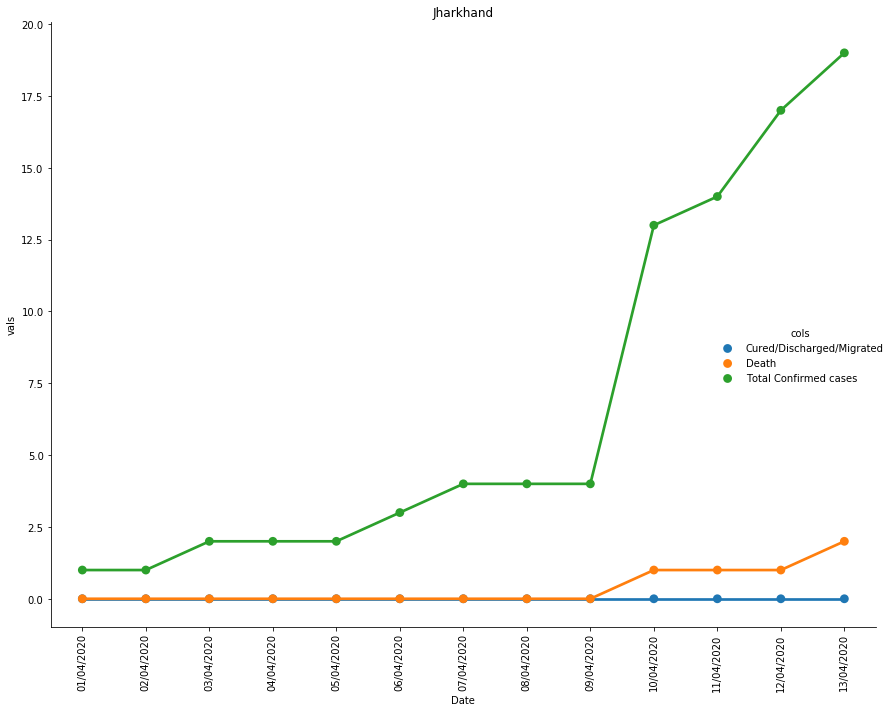

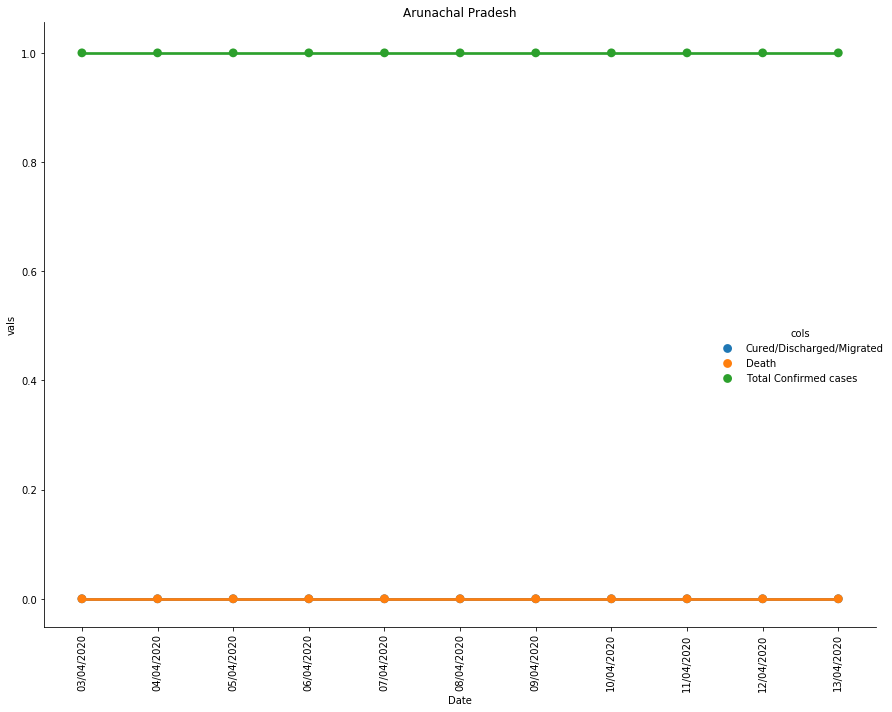

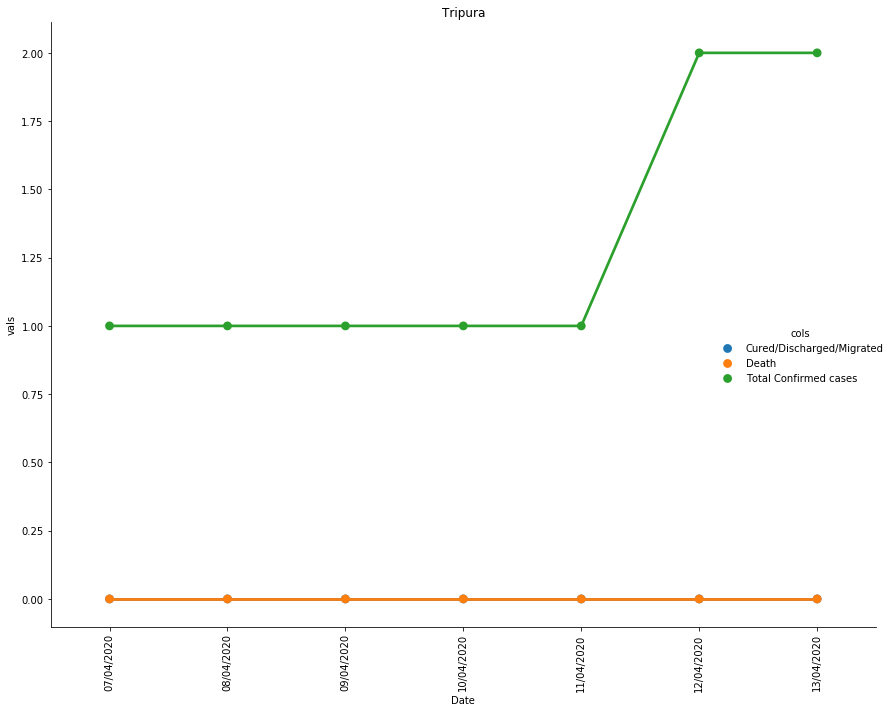

In [6]:
for State in states:
    State_Specific = complete[complete['Name of State / UT'] == State]
    State_Specific.drop(['Name of State / UT', 'Total Confirmed cases (Indian National)', 
                'Total Confirmed cases ( Foreign National )', 'Latitude','Longitude'], axis=1, inplace=True)
    State_Specific = State_Specific.melt('Date', var_name='cols',  value_name='vals')
    g = sns.catplot(x="Date", y="vals", hue='cols', data=State_Specific,height =10,kind='point')
    plt.xticks(rotation=90)
    plt.title(State)
    plt.tight_layout()
    plt.savefig('images/'+str(State)+'.png')
    print('-------------------------------------------------------------------------------')
    

In [7]:
complete['death percentage'] = (complete['Death']/complete['Total Confirmed cases'])*100
complete['cured percentage'] = (complete['Cured/Discharged/Migrated']/complete['Total Confirmed cases'])*100

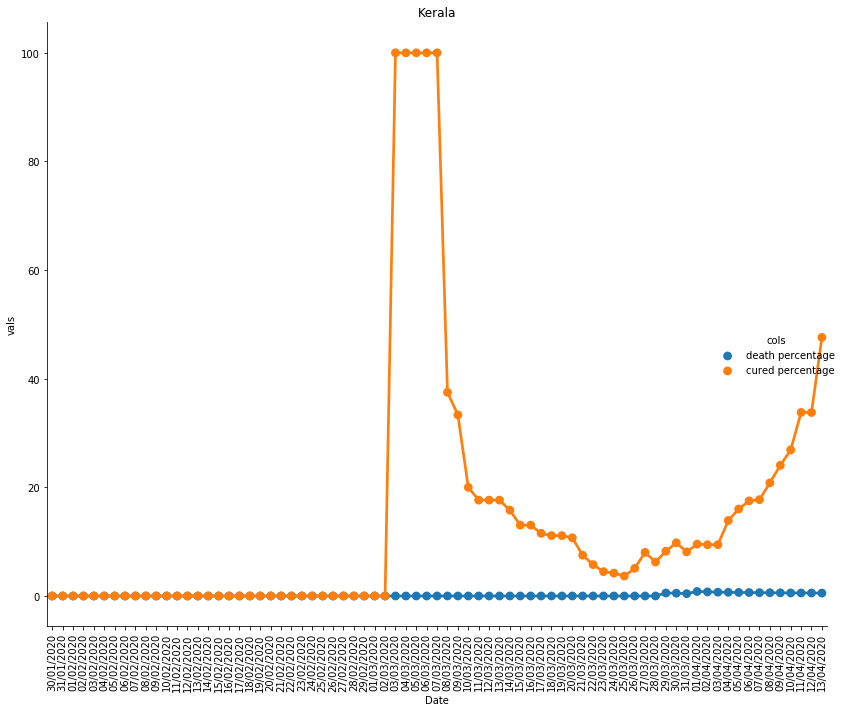

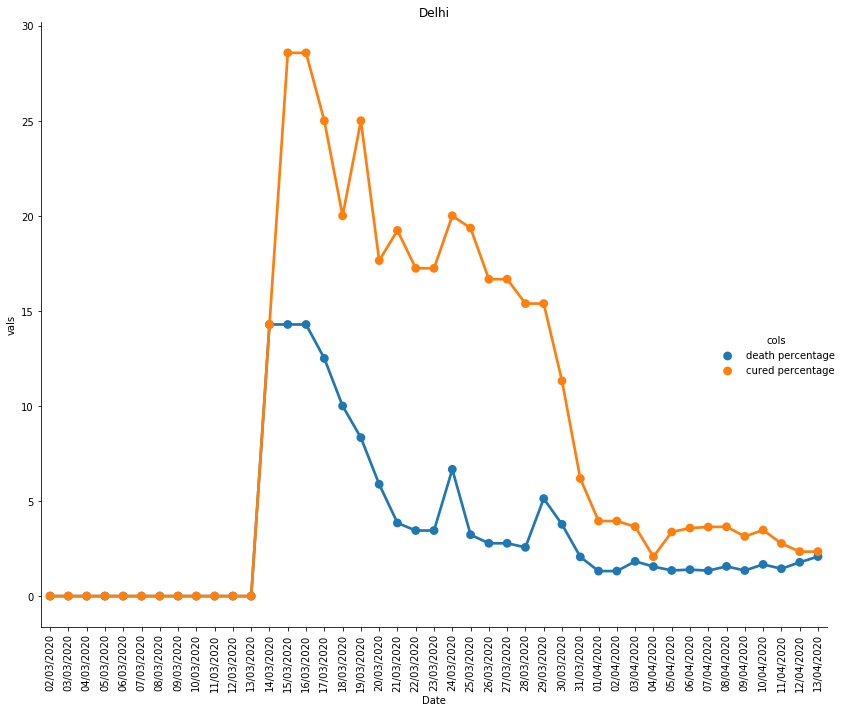

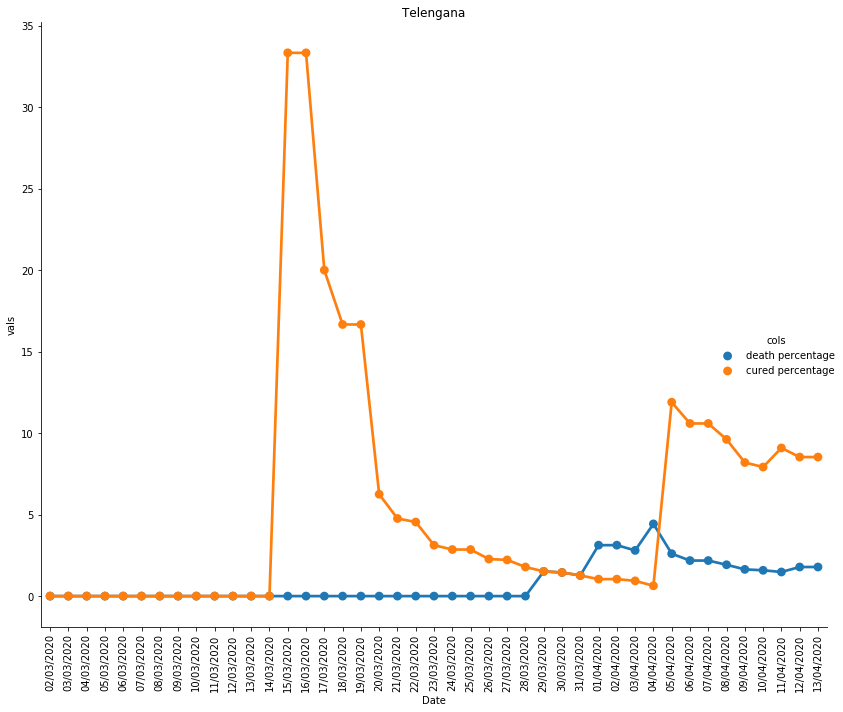

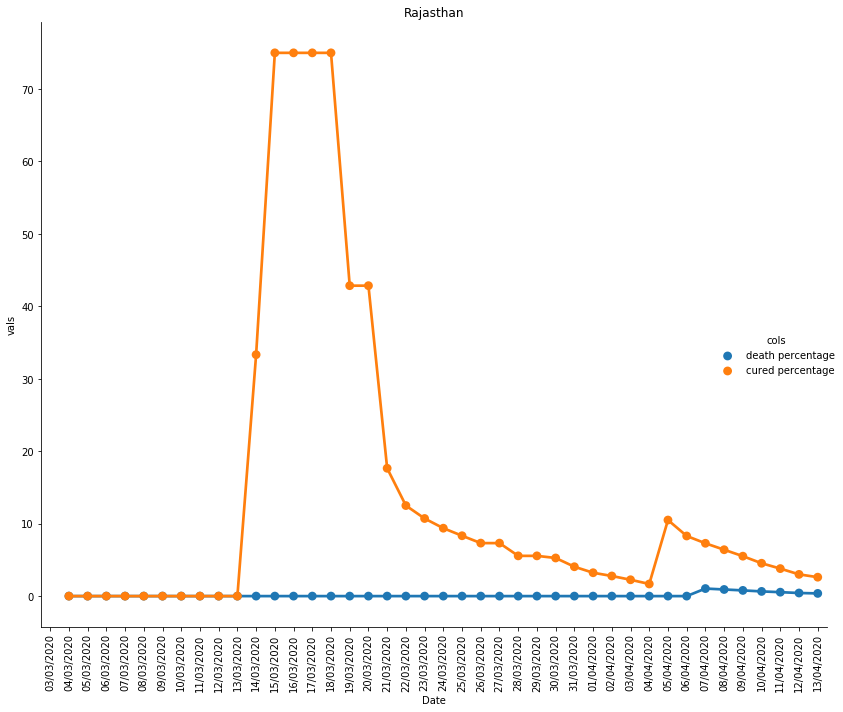

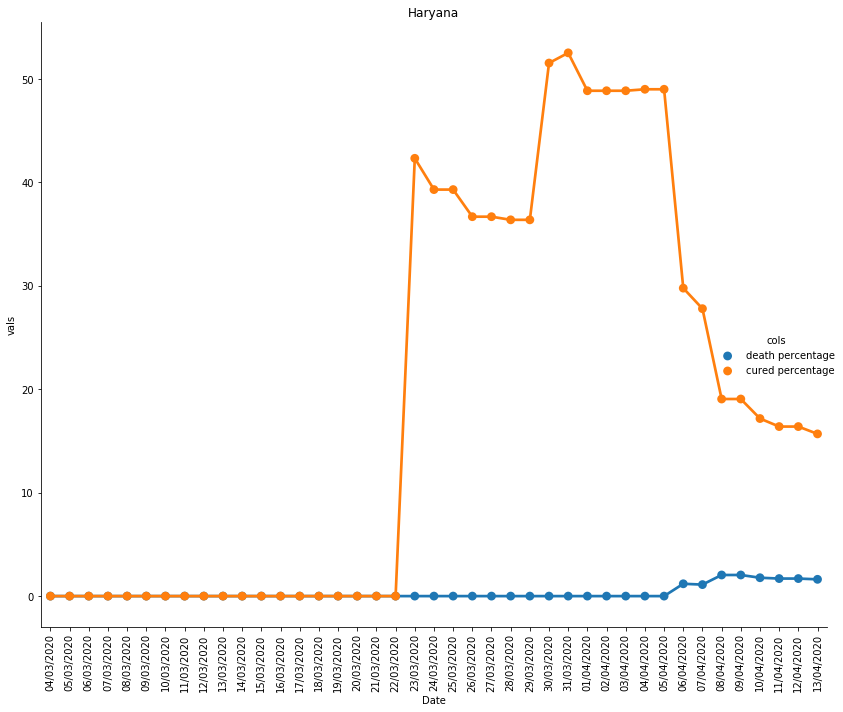

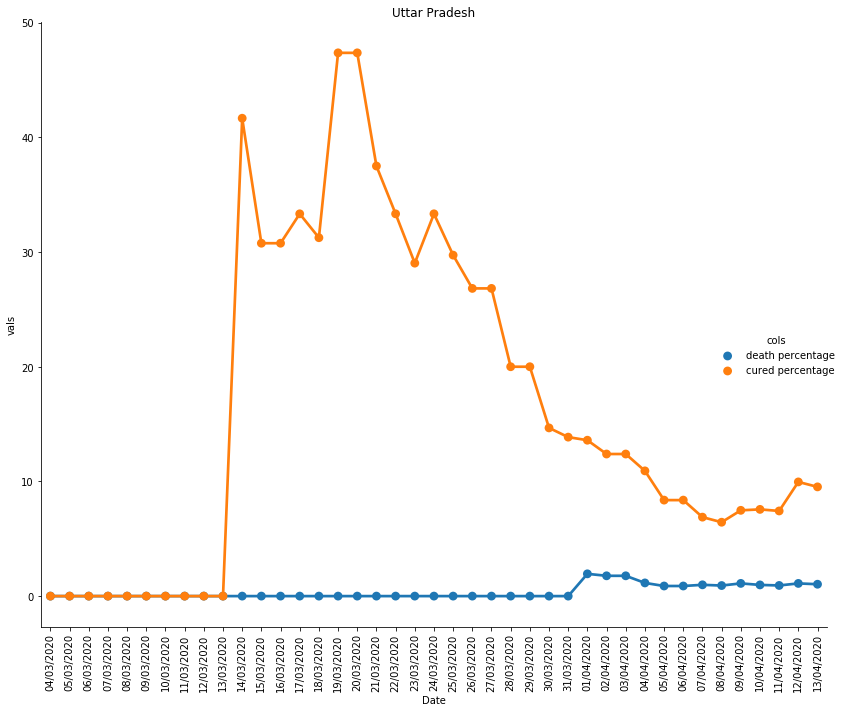

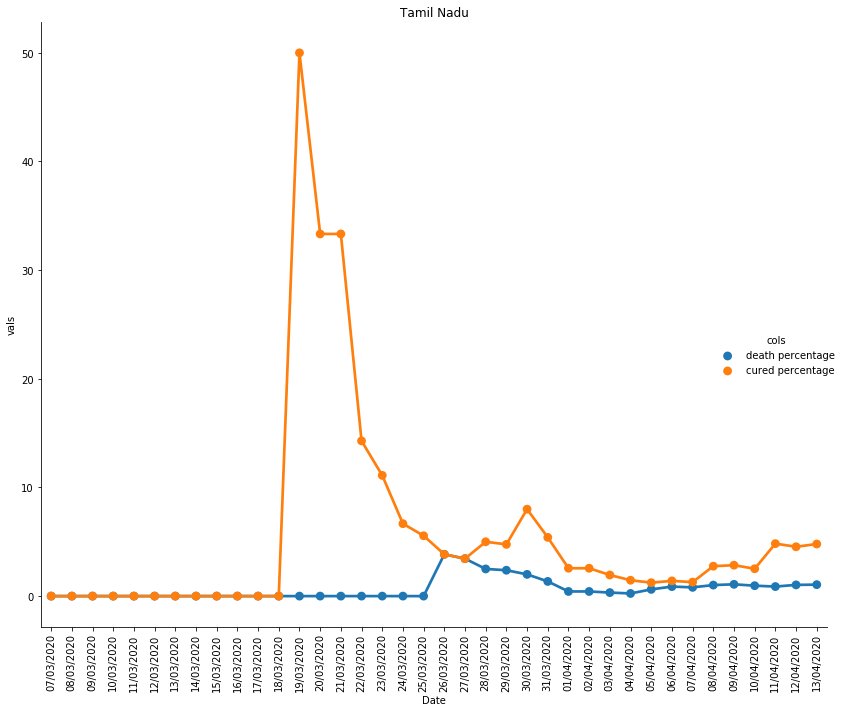

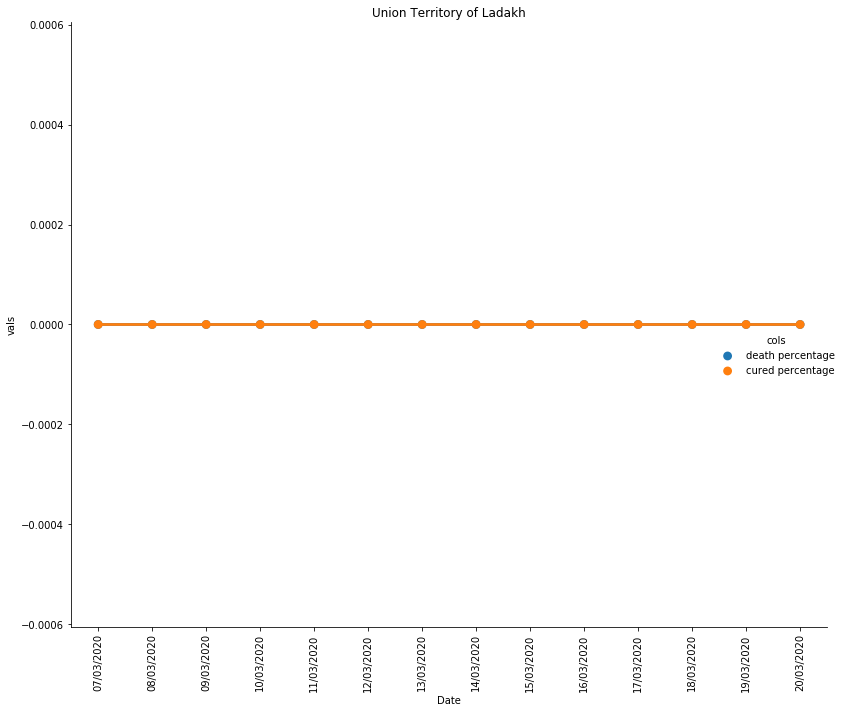

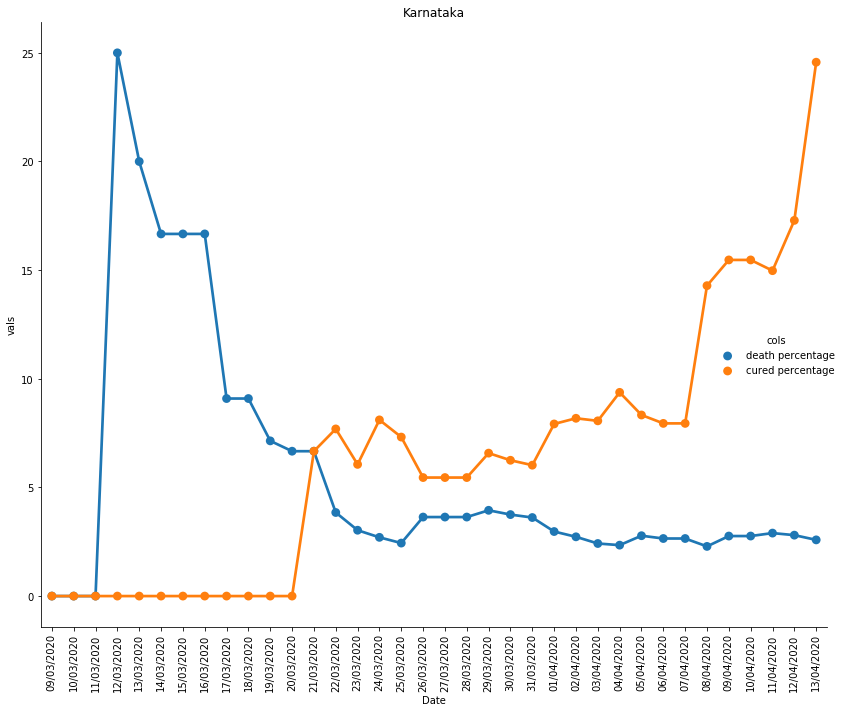

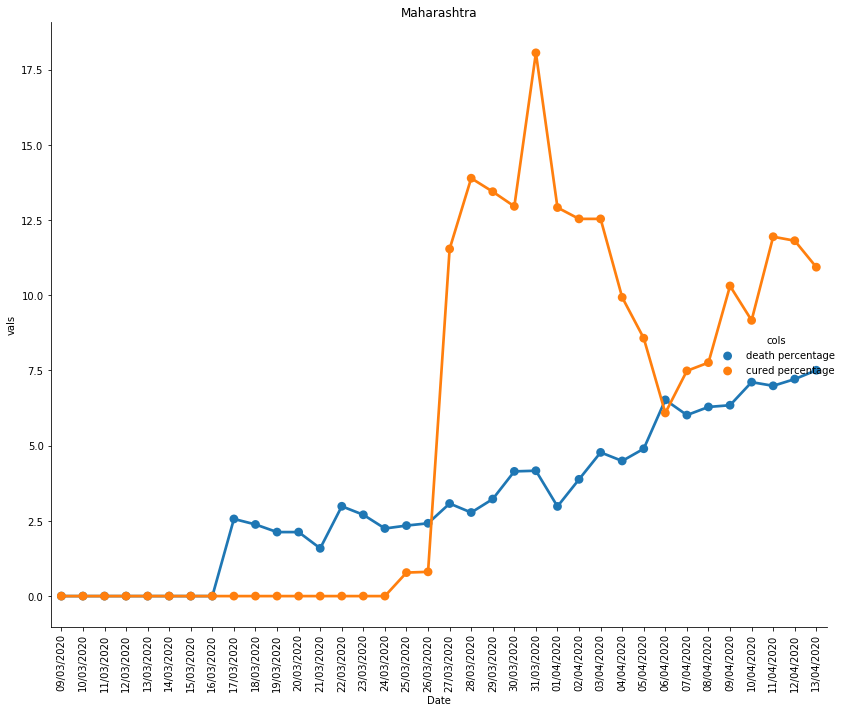

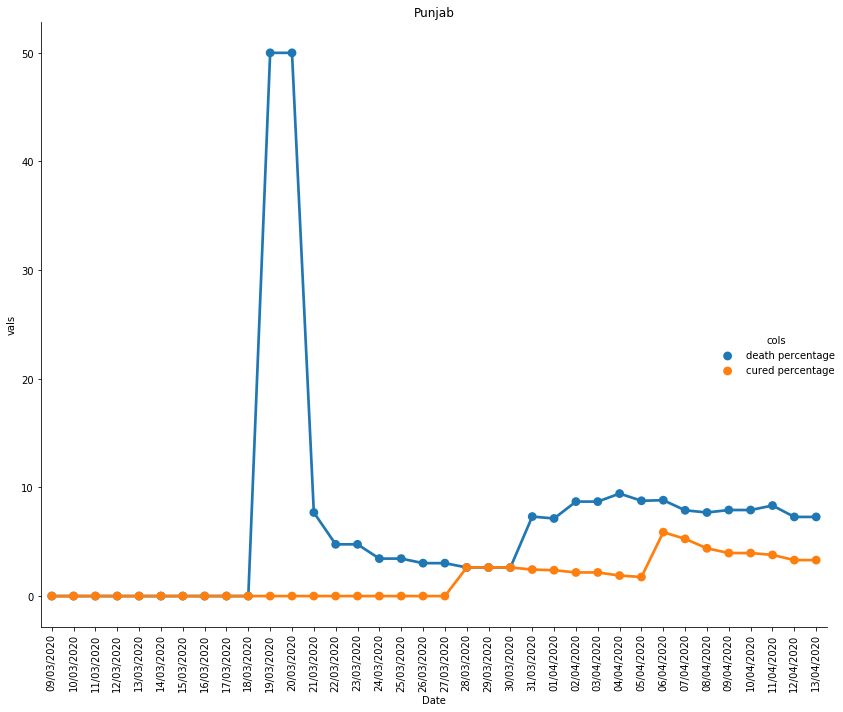

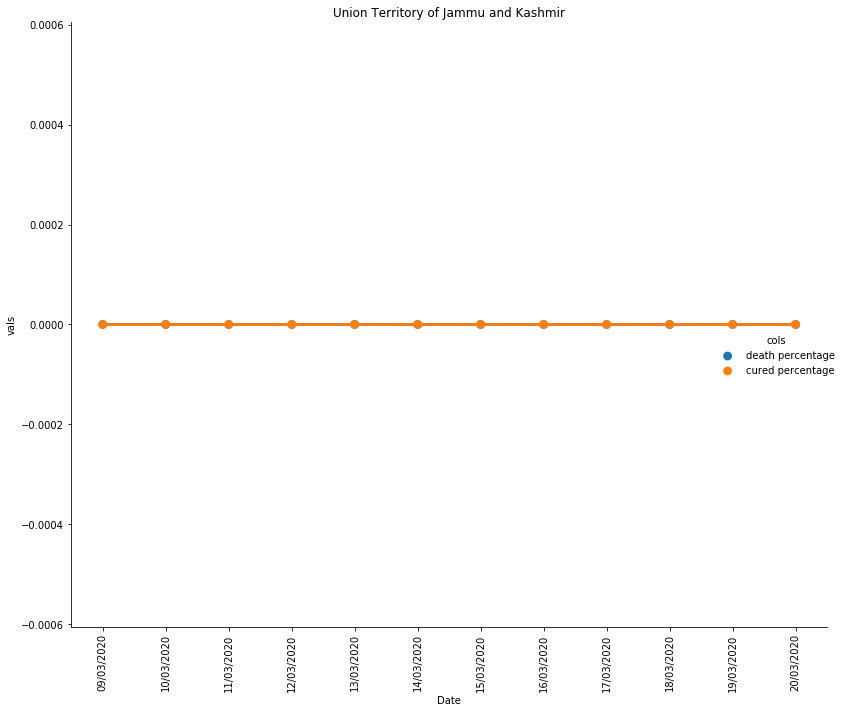

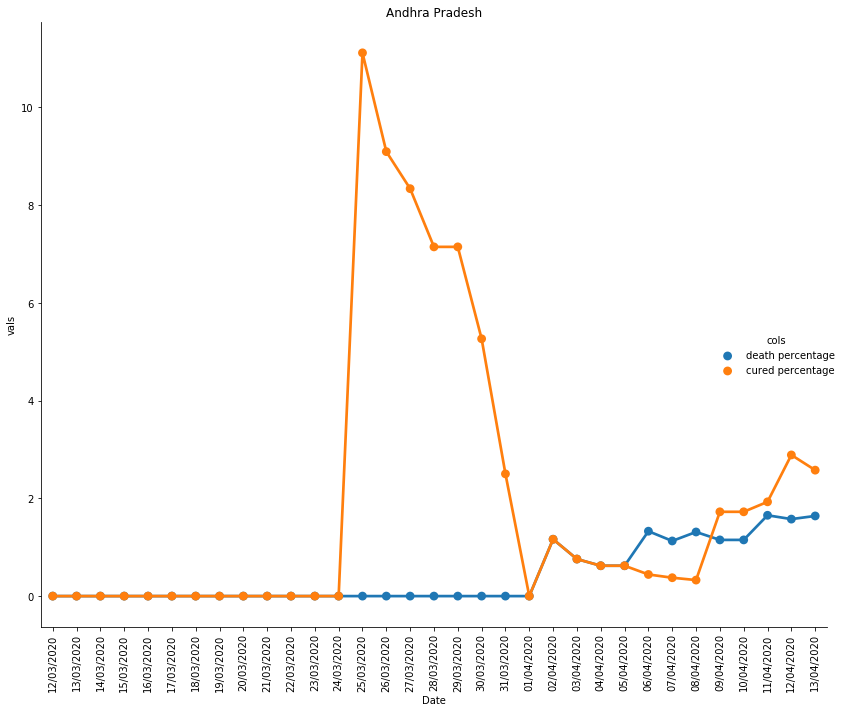

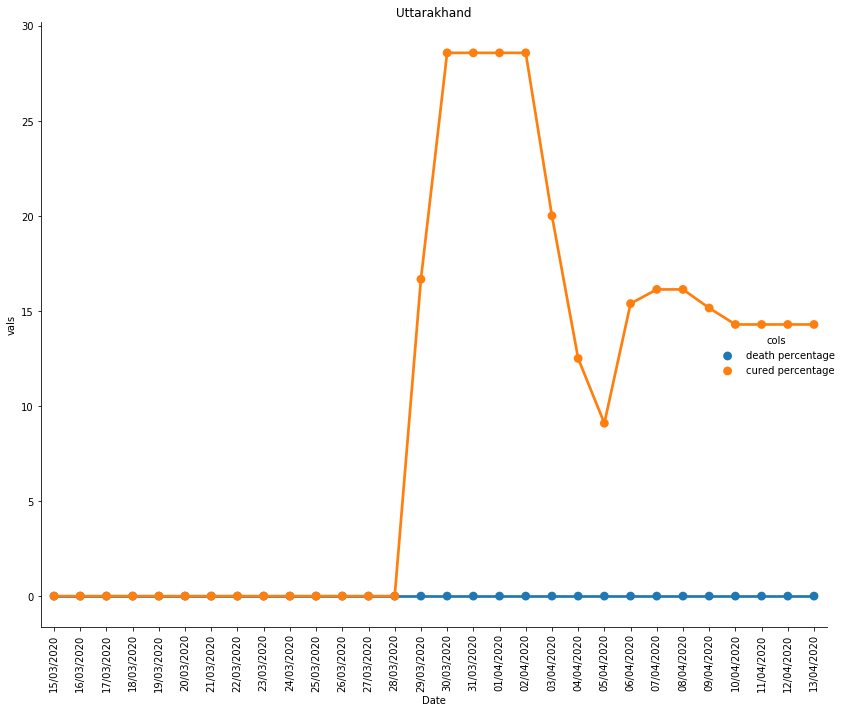

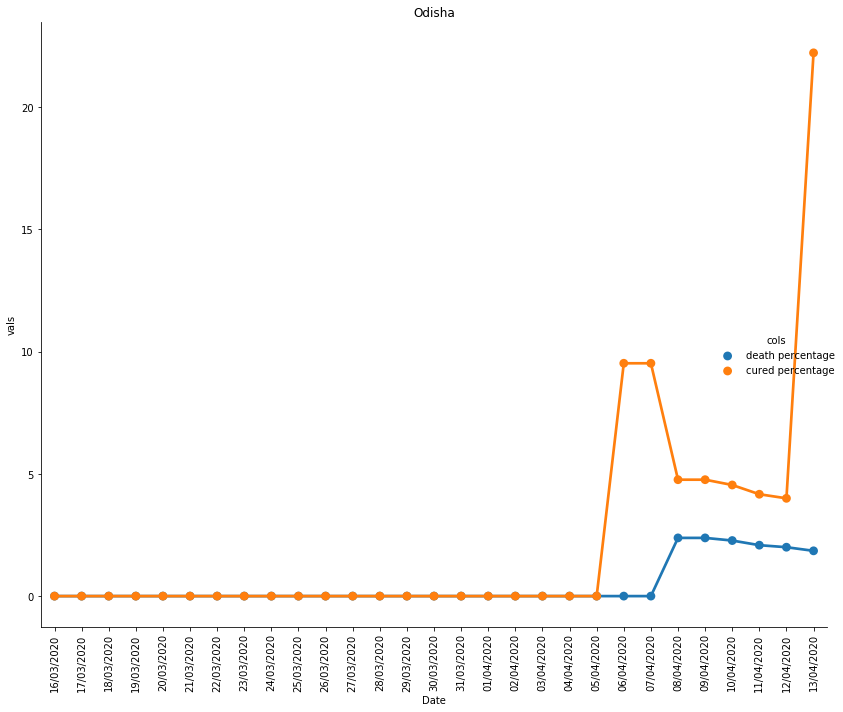

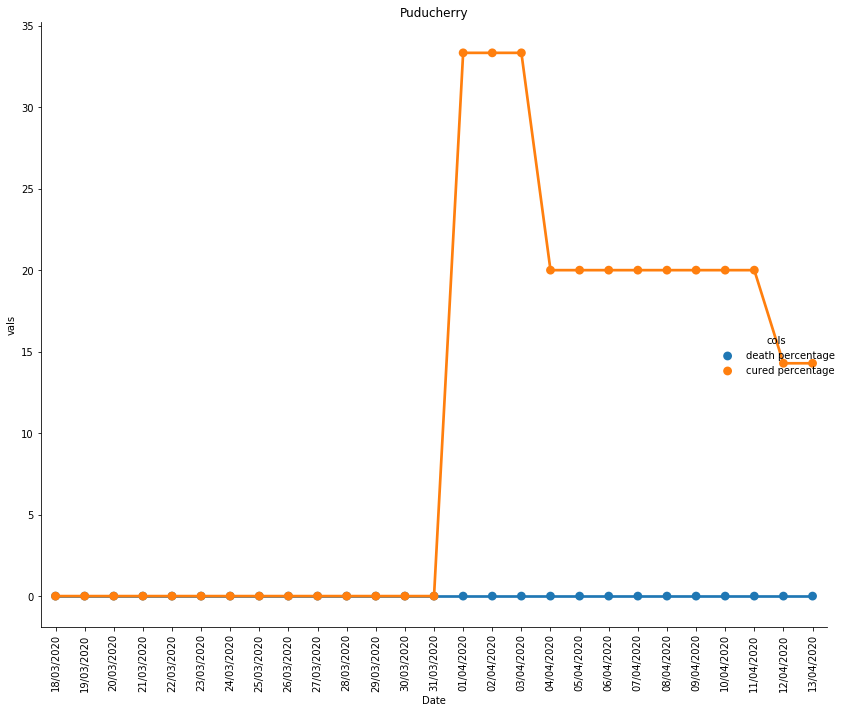

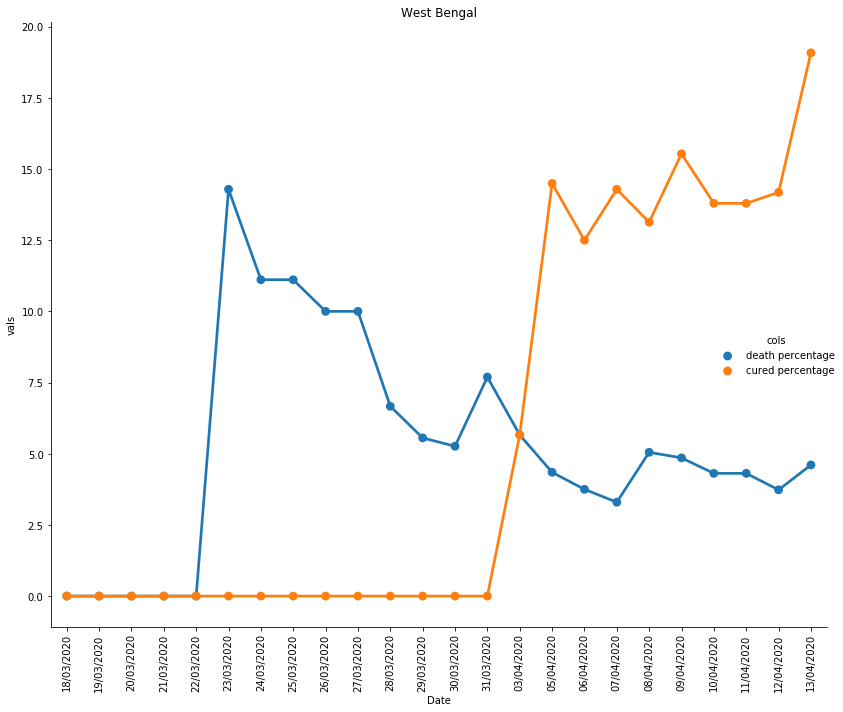

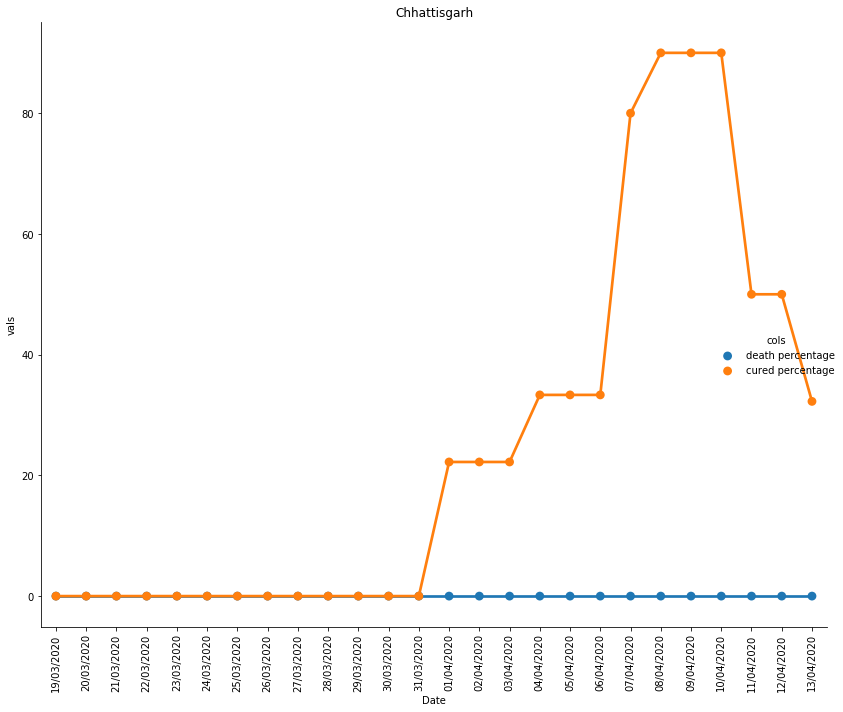

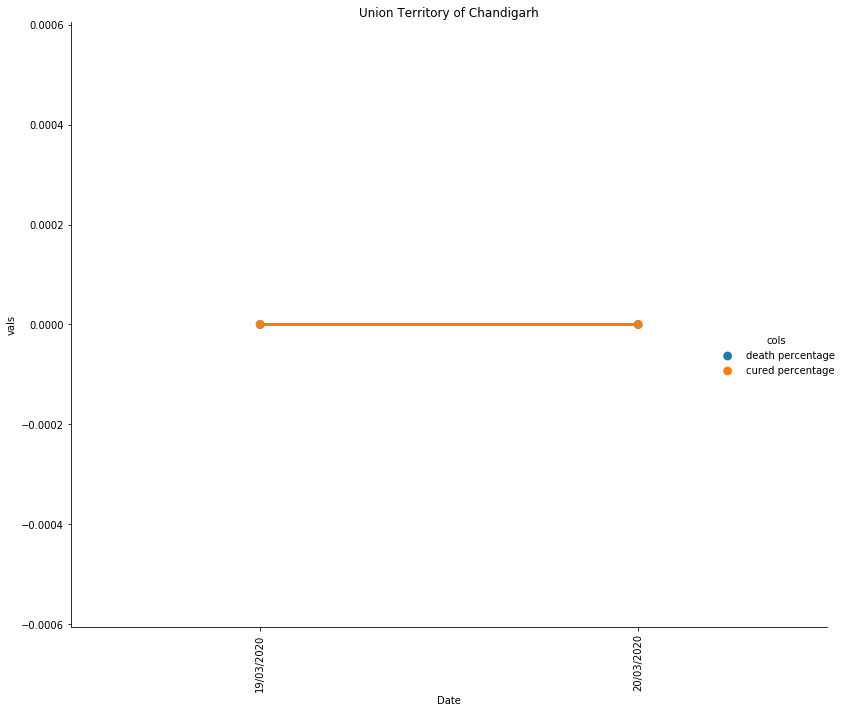

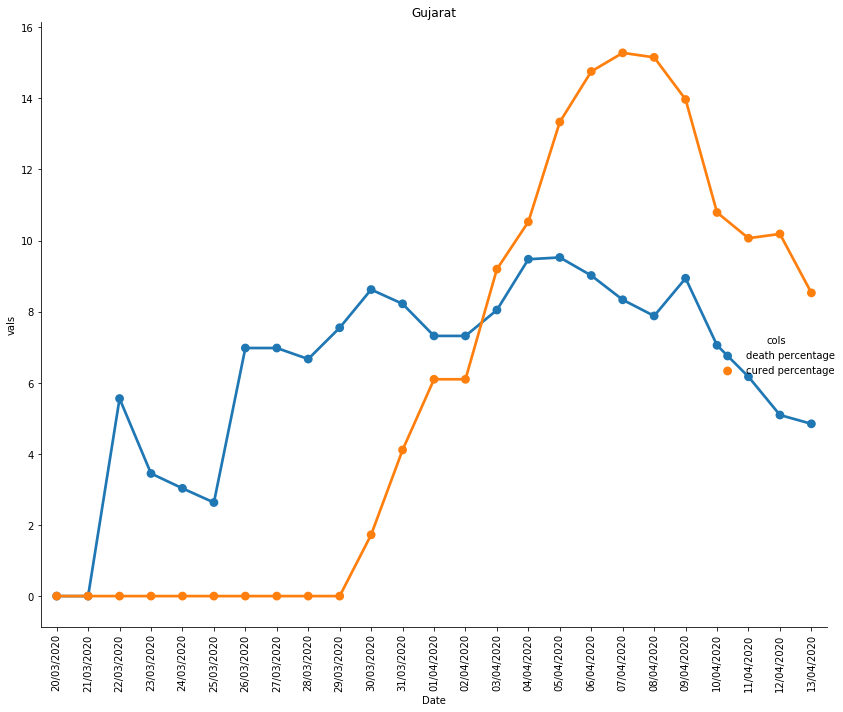

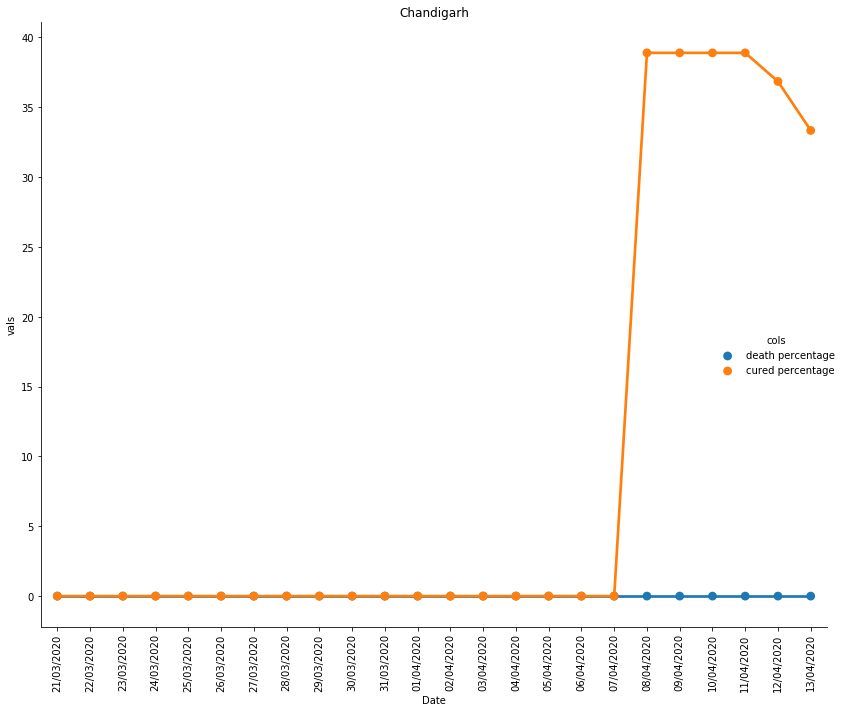

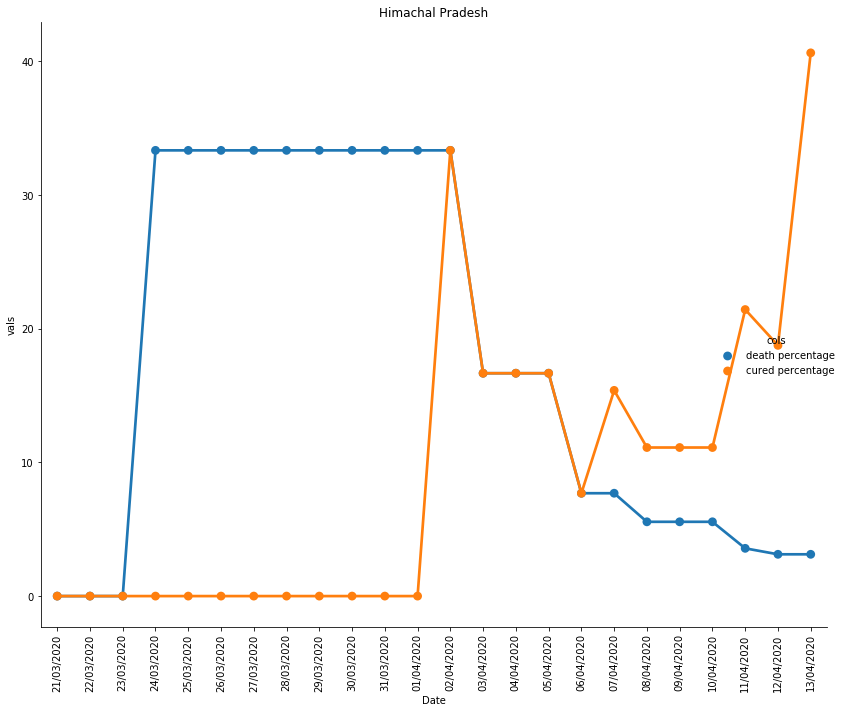

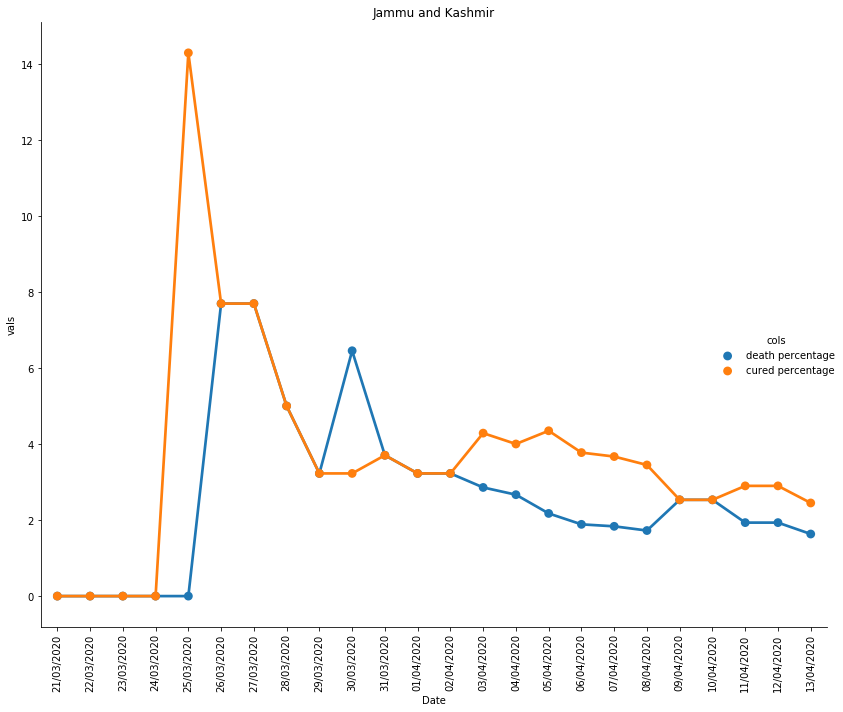

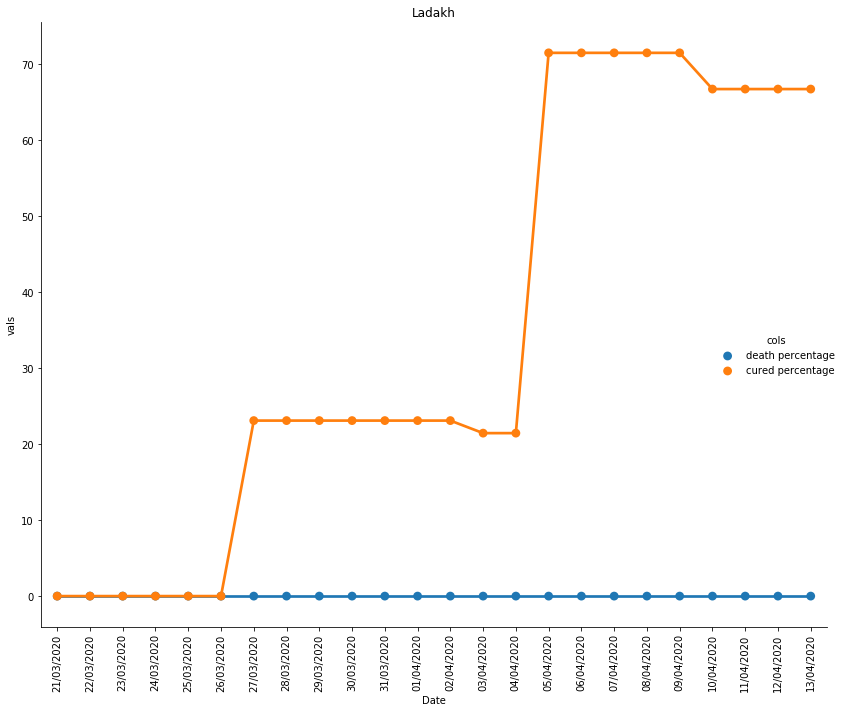

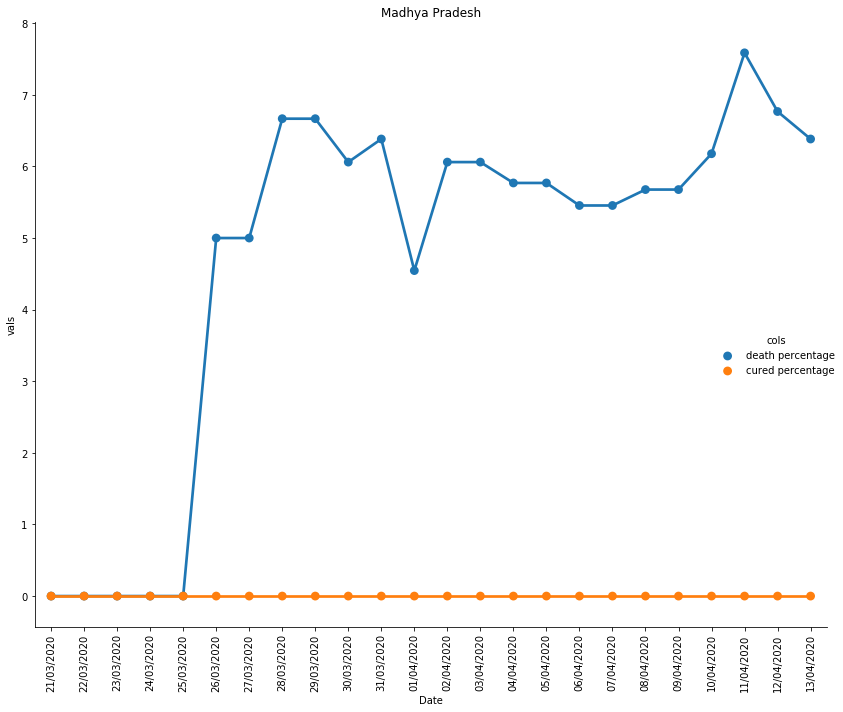

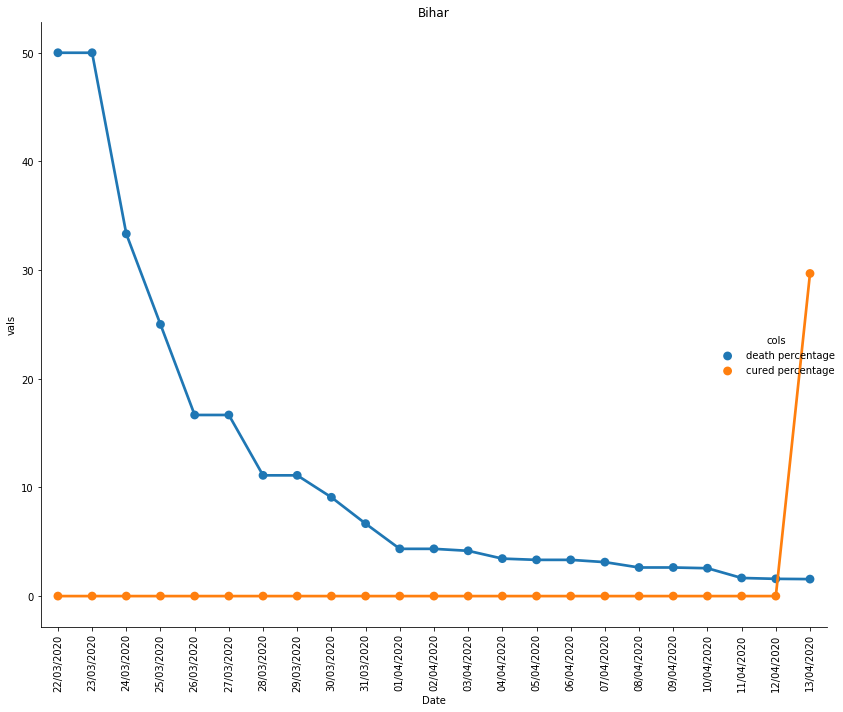

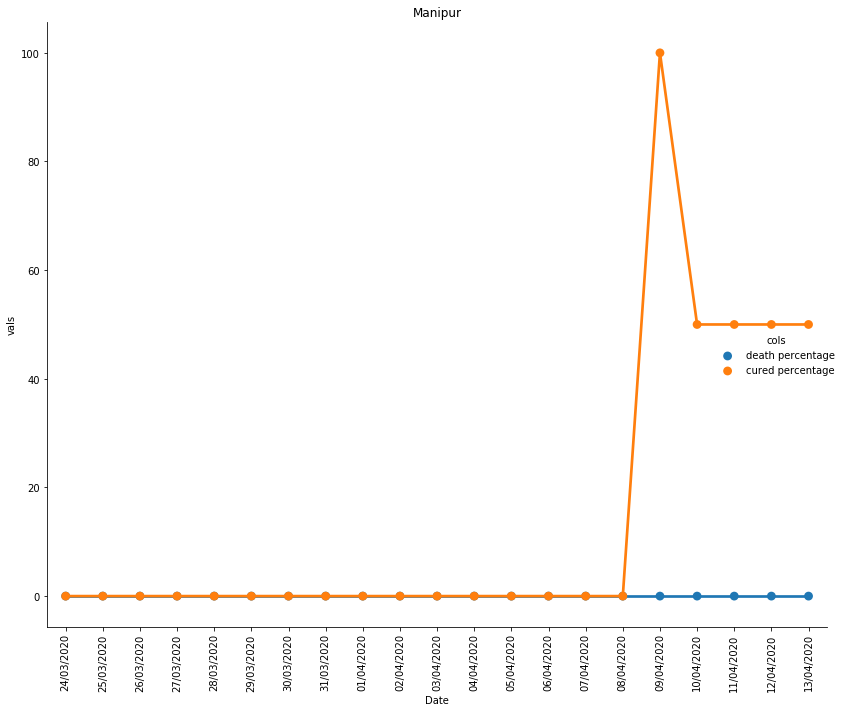

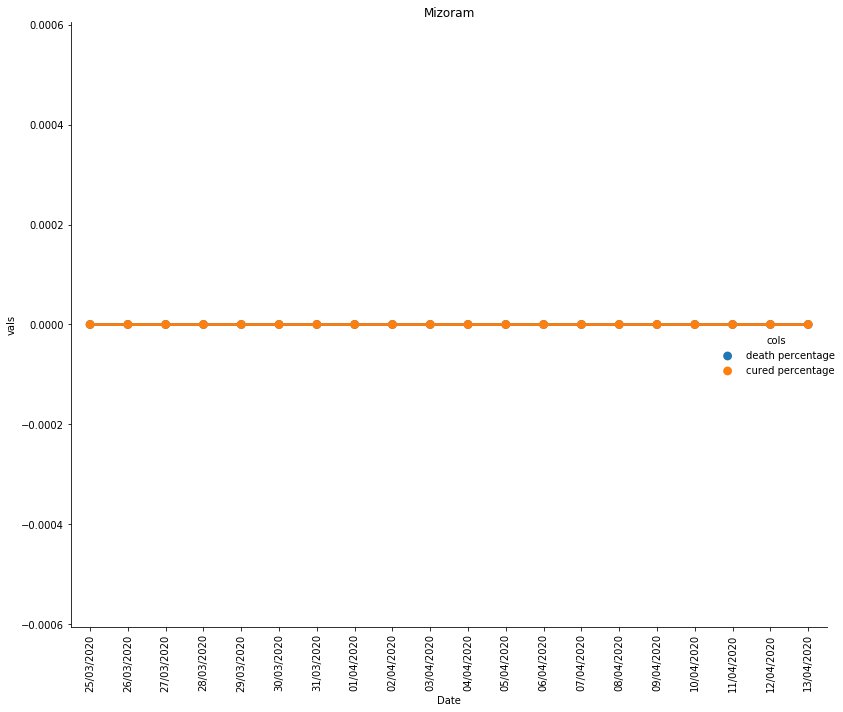

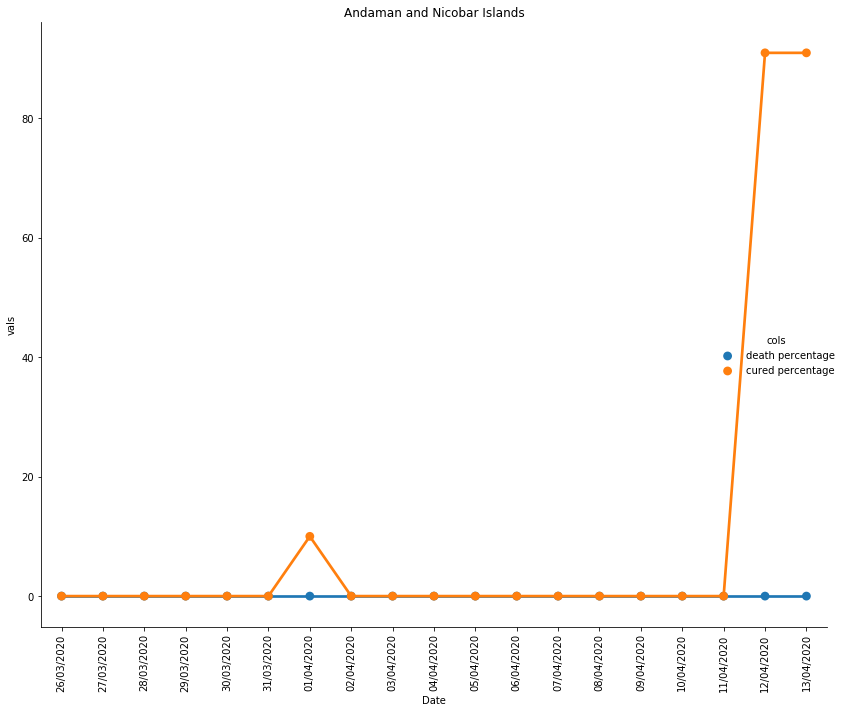

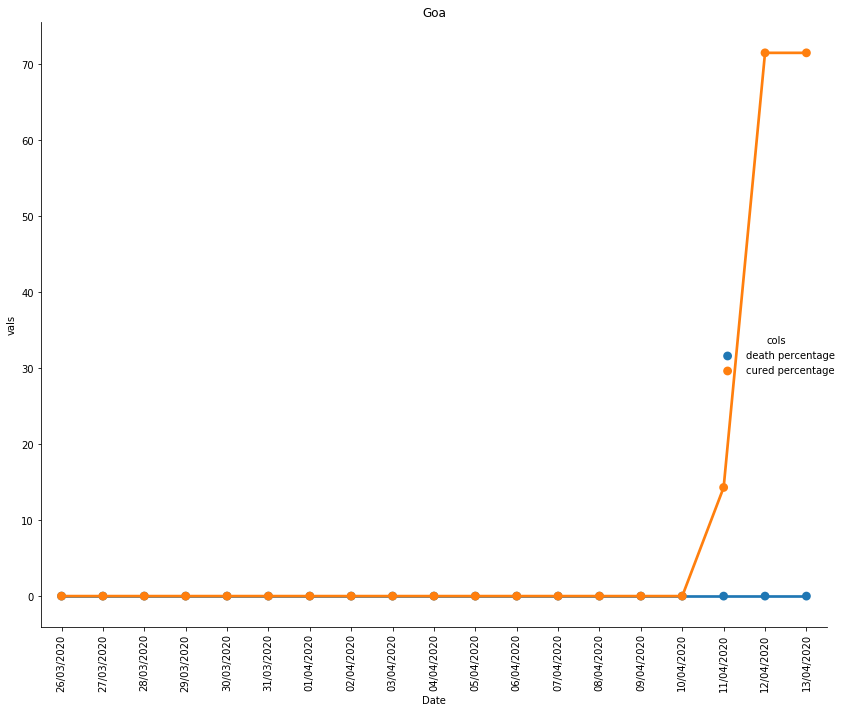

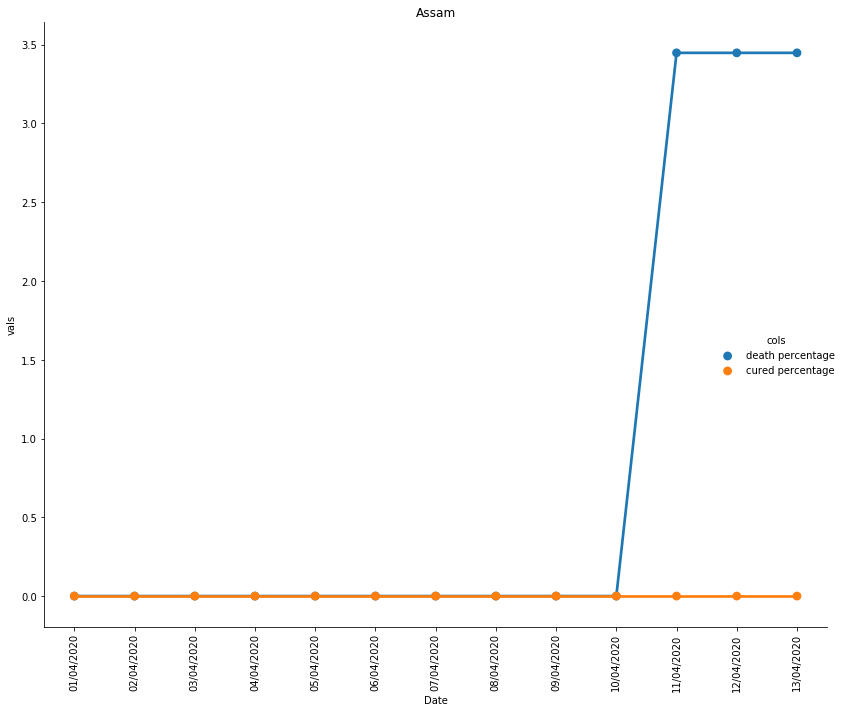

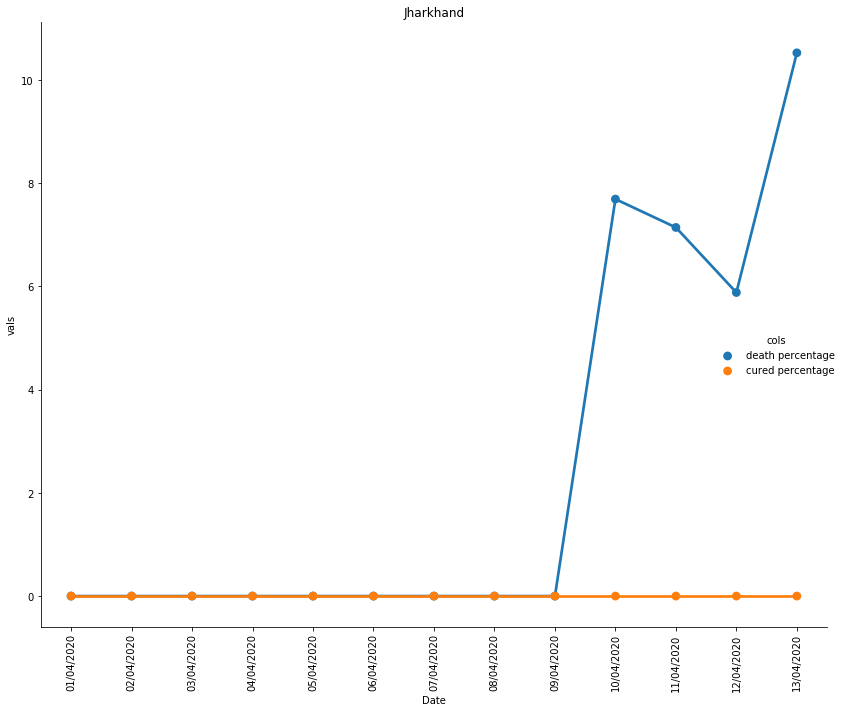

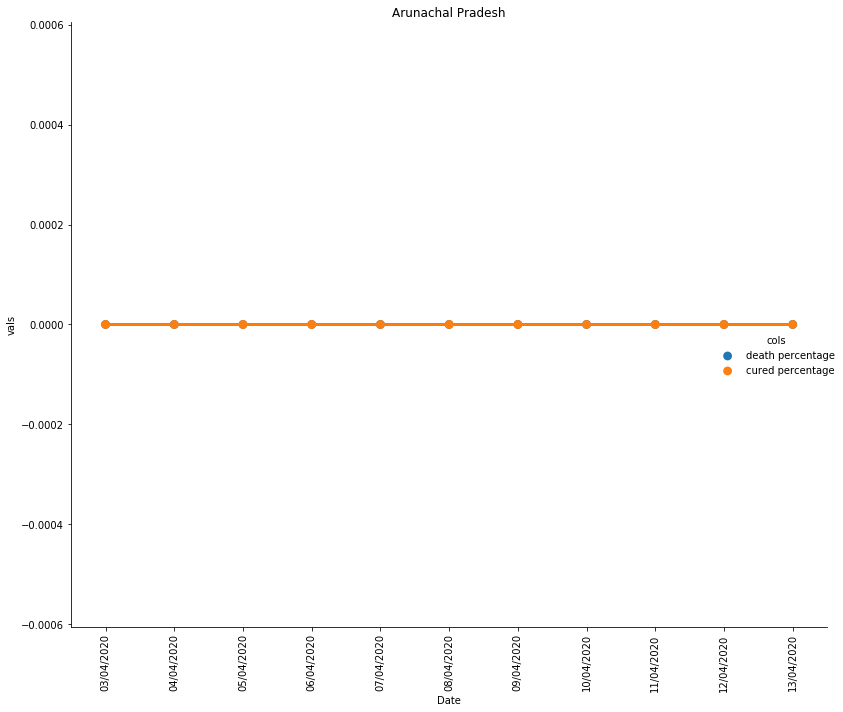

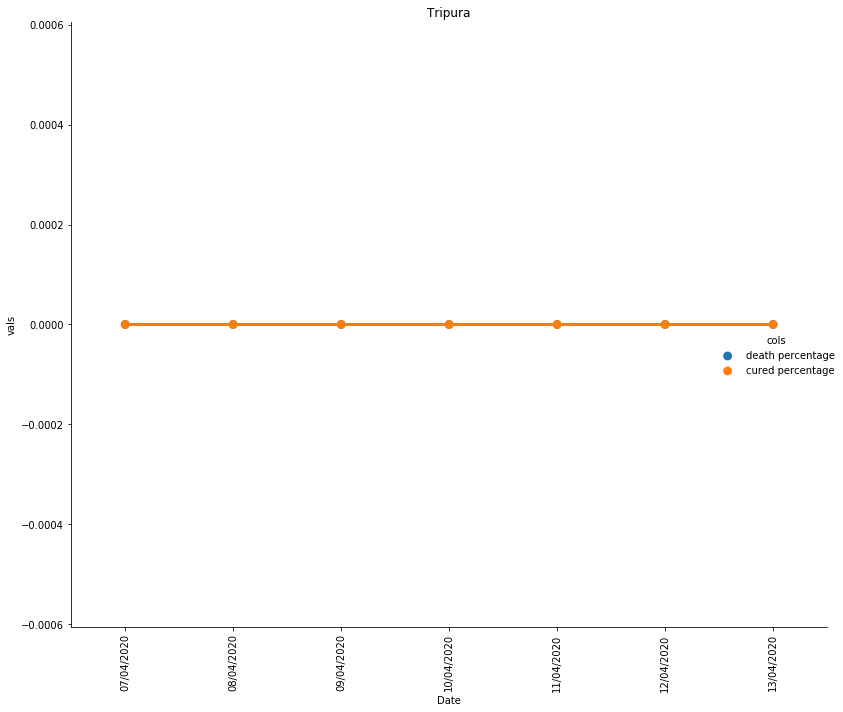

In [8]:
for State in states:
    State_Specific = complete[complete['Name of State / UT'] == State]
    State_Specific.drop(['Name of State / UT', 'Total Confirmed cases (Indian National)', 
               'Total Confirmed cases ( Foreign National )', 'Latitude','Longitude','Cured/Discharged/Migrated','Total Confirmed cases','Death'], axis=1, inplace=True)
    State_Specific = State_Specific.melt('Date', var_name='cols',  value_name='vals')
    g = sns.catplot(x="Date", y="vals", hue='cols', data=State_Specific,height =10,kind='point')
    plt.xticks(rotation=90)
    plt.title(State)
    plt.tight_layout()
    plt.savefig('images/'+str(State)+'-death-cured-percentage.png')
    

In [23]:
patient_data = pd.read_csv('patients_data.csv')
patient_data.fillna('nil',inplace=True)


In [24]:
patient_data.columns

Index(['patient_number', 'state_patient_number', 'date_announced',
       'age_bracket', 'gender', 'detected_city', 'detected_district',
       'detected_state', 'state_code', 'current_status', 'notes',
       'suspected_contacted_patient', 'nationality', 'type_of_transmission',
       'status_change_date', 'source_1', 'source_2', 'source_3',
       'backup_notes'],
      dtype='object')

# Gender trend of covid patients

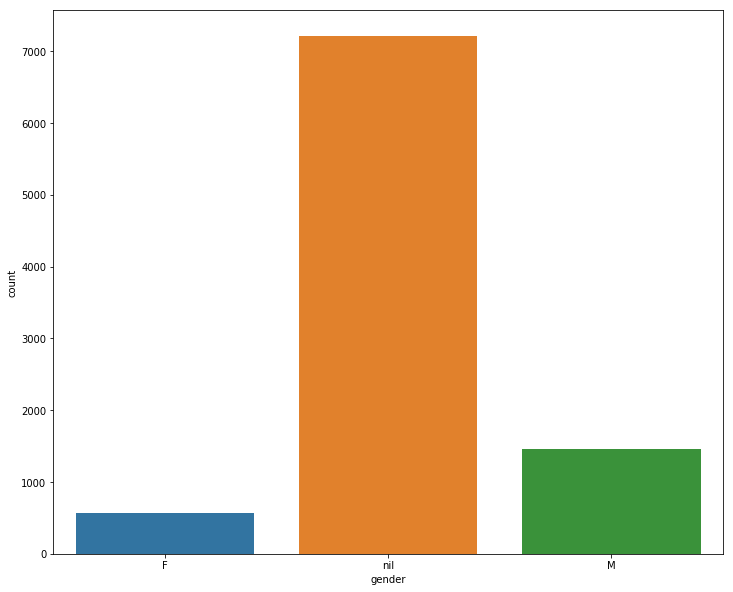

In [29]:

plt.figure(figsize=(12,10))
sns.countplot(x='gender',data=patient_data)
plt.savefig('images/Gender trend of covid patients.png')


In [26]:
patient_data.dtypes

patient_number                  int64
state_patient_number           object
date_announced                 object
age_bracket                    object
gender                         object
detected_city                  object
detected_district              object
detected_state                 object
state_code                     object
current_status                 object
notes                          object
suspected_contacted_patient    object
nationality                    object
type_of_transmission           object
status_change_date             object
source_1                       object
source_2                       object
source_3                       object
backup_notes                   object
dtype: object

# Current  status of covid patients

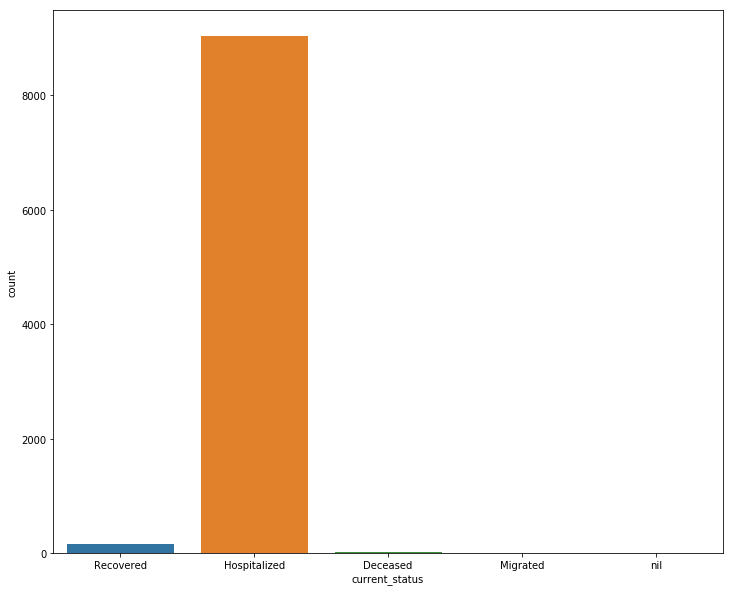

In [30]:
plt.figure(figsize=(12,10))
sns.countplot(x='current_status',data=patient_data)
plt.savefig('images/Current status of covid patients.png')

# Transmission type of covid patients

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(x='type_of_transmission',data=patient_data)
plt.savefig('images/Transmission type of covid patients.png')